

---
# **Biodiversity and Resilience in Smart Cities** 🐳🌆🌳
---





# Packages
---

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import glob
import os

In [2]:
import geopandas as gpd

In [3]:
!pip install seaborn

In [4]:
import seaborn as sns

In [5]:
! pip install plotly.express
import plotly.express as px #annotations

In [6]:
#to export plotly images 
if not os.path.exists("images"):
    os.mkdir("images")

In [7]:
#! pip install chart_studio.plotly as py
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

In [8]:
!pip install --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org plotly 

In [9]:
!pip install ipyplot 
from shapely.geometry.polygon import LinearRing, Polygon

import zipfile 
import numpy as np



# Geographic Data

----


## Shape and Polygons Initial Data

####  Chile Regions Downloaded from  [BCN](https://www.bcn.cl/siit/mapas_vectoriales/index_html)

In [886]:
# GOOGLE COLAB   ch = gpd.read_file('Datos/DatShape/Regiones/Regional.shp') #regiones de Chile en tal long, pero EPSG diferente a ch_wgs
ch = gpd.read_file(r'C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Datos\DatShape/Regiones/Regional.shp')
ch = ch.to_crs("EPSG:32719") #Chile Regions UTM
ch_wgs = ch.to_crs("EPSG:4326") #Chile Regions lat long

#### Urban shapes to analyze

In [11]:
#Leer la capa y guardarla como GeoDataFrame
df = gpd.read_file(r'C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Datos\DatShape\Entidades_urb_UTM19S.shp')

#Limpieza información del GeoDataFrame df
#se eliminaron: 'timestamp','begin', 'end','altitudeMo','tessellate','extrude','visibility','drawOrder','icon','snippet' porque todas tenían la misma info: None	None	None	clampToGround	-1	0	-1	None	None	None
df.drop(columns=['timestamp','begin', 'end','altitudeMo','tessellate','extrude','visibility','drawOrder','icon','snippet'], inplace=True) 

#Capa de entidades urbanas en lat long
df_wgs = df.to_crs("EPSG:4326") #GeodataFrame en lat long (EPSG 4326 WGS 84)

In [37]:
cities = df.Name        #serie de las ciudades
n_cities = df.shape[0]  #53 ciudades, desde 0 a 52 
                        #se usa 0 porque o si no, entrega #filas,#columnas y yo necesito #filas

## Polygons and hull of cities


#### Urban shapes buffer

In [13]:
df_buffer = df.copy()
df_buffer['geometry'] = df_buffer['geometry'].buffer(1000) #1 km buffer 
df_buffer_wgs = df_buffer.to_crs("EPSG:4326") # lat long (wgs) buffer
#df_buffer.count() #to verify 53 buffers (53 cities)

In [14]:
#The convex hull of a geometry is the smallest convex Polygon containing all the points in each geometry
df_hull = df_buffer_wgs.convex_hull 

#### Save urban shapes

In [19]:
ciudades = {}       #así se guardarán como diccionario. Cada ciudad tiene Name, descriptio, geometry
ciudades_buf = {}   #idem para buffers. Cada ciudad tiene Name, descriptio, geometry
ciudades_bound = {} #

for ciudad in df_wgs['Name'].unique():

  ciudades[ciudad] =  df_wgs[df.Name == ciudad]
  ciudades_buf[ciudad] = df_buffer_wgs[df_buffer.Name == ciudad]
  ciudades_bound[ciudad] = df_buffer_wgs[df.Name == ciudad].convex_hull

#Esto lo debía haber hecho con el diccionario anterior, pero al final lo hice a mano
saavedra = df_hull.loc[0]  
queule = df_hull.loc[1]
serena = df_hull.loc[2]   
coquimbo = df_hull.loc[3]   
guana = df_hull.loc[4]   
vilos = df_hull.loc[5]   
pichidan = df_hull.loc[6]   
tongoy = df_hull.loc[7]   
ventanas = df_hull.loc[8]   
concon = df_hull.loc[9]   
zapa = df_hull.loc[10]   
tabo = df_hull.loc[11]   
vina = df_hull.loc[12]   
hang = df_hull.loc[13]   
antonio = df_hull.loc[14]   
valpo = df_hull.loc[15]  
domingo = df_hull.loc[16]   
quisco = df_hull.loc[17]   
quintero = df_hull.loc[18]   
papudo = df_hull.loc[19]   
cartage = df_hull.loc[20]   
alga = df_hull.loc[21]   
iquique = df_hull.loc[22]   
pichilemu = df_hull.loc[23]  
cobquecura = df_hull.loc[24]   
consti = df_hull.loc[25]   
iloca = df_hull.loc[26]   
niebla = df_hull.loc[27]   
corral = df_hull.loc[28]   
mansa = df_hull.loc[29]   
maullin = df_hull.loc[30]   
caremapu = df_hull.loc[31]   
ancud = df_hull.loc[32]   
chanaral = df_hull.loc[33]   
arica = df_hull.loc[34]   
antofa = df_hull.loc[35]   
tocopilla = df_hull.loc[36]   
mejillones = df_hull.loc[37]   
taltal = df_hull.loc[38]   
caldera = df_hull.loc[39]   
huasco = df_hull.loc[40]   
quidico = df_hull.loc[41]   
tirua = df_hull.loc[42]   
coronel = df_hull.loc[43]   
lota = df_hull.loc[44]   
penco = df_hull.loc[45]   
pedro = df_hull.loc[46]   
talcahuano = df_hull.loc[47]   
tumbes = df_hull.loc[48]   
tome = df_hull.loc[49]   
hualpen = df_hull.loc[50]   
arauco = df_hull.loc[51]   
lebu = df_hull.loc[52] 

#### Maps

In [16]:
fig = go.Figure(ch)

NameError: name 'go' is not defined

In [ ]:
fig, ax = plt.subplots(figsize = (10,20))
ax.set_xlim([-500000, 1000000])
ax.set_ylim([3500000, 8100000])
ch.plot(ax=ax, color='green')
df.plot(ax=ax,color="red")


# Biodiversity Data

---

## GBIF

In [48]:
import plotly.express as px
!pip install pygbif
from pygbif import occurrences as occ

  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0


ModuleNotFoundError: No module named 'requests_cache.core'

## Chile 




In [49]:
years = [2017,2018,2019,2020,2021,2022]
occ_chile = [ 362765 , 470729 , 652033 , 614853 , 702368 , 19103 ] # datos de ocurrencias en Chile 
                                                                  # los saqué a mano de: https://www.gbif.org/occurrence/charts?q=chile&year=2017,2022 
                                                                  # para no tener que descargar todo
chile = pd.DataFrame()
chile['Years']=years
chile['Occurrences']=occ_chile
occ_total=chile['Occurrences'].sum()
chile['perc_year'] = round(chile['Occurrences']/occ_total*100,1).astype(str) + '%'

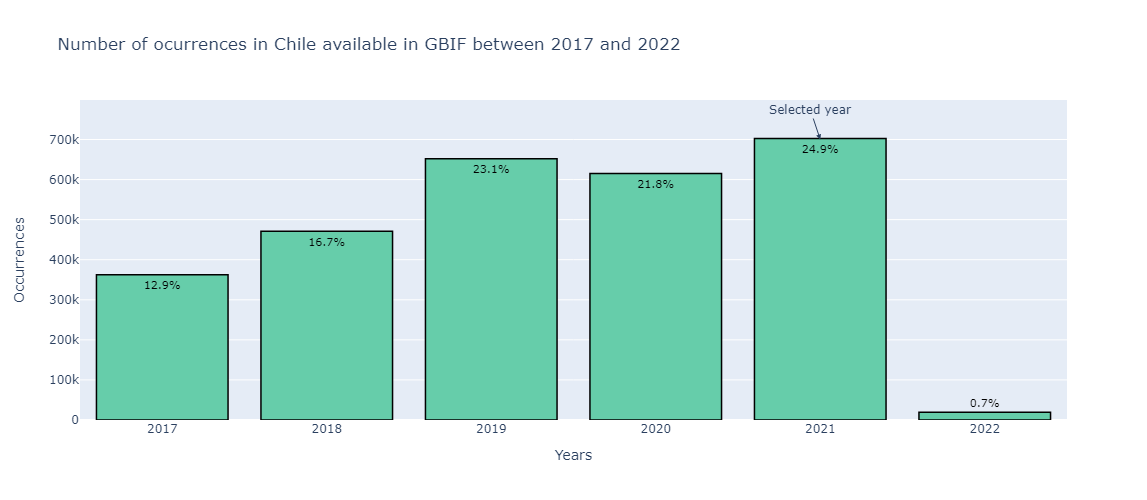

In [184]:
colorc = ['turquoise']
fig = px.bar(chile, x='Years', y='Occurrences', text='perc_year', 
             title='Number of ocurrences in Chile available in GBIF between 2017 and 2022')
fig.add_annotation(x=2021, y=700_000,
            text="Selected year",
            showarrow=True,
            arrowhead=2)
fig.update_traces(marker_color='mediumaquamarine', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')
#fig.update_layout(autosize=False, width=1100, height=800) 
fig.update_layout(autosize=False, width=800, height=500) 
fig.show()


## Cities BD downloading from GBIF

In [20]:
# no encuentro el código donde descargué los zip, pero es algo así

#occ_lebu = occ.search(geometry=str(lebu) , year=(2017,2022))

# y no recuerdo si usé occurrences.get occurrences.search (occ.search) u occurrences.download (occ.download). Pero las descargué y quedan en .zip

## Cities BD uploading from downloades files (zip)

In [36]:
files = glob.glob('C:\\Users\\Mariana\\Desktop\\GBIF_BDdata\\**\\occurrence.txt',recursive=True)
col_used = [0,26,59,63,67,72,106,107,108,137,138,180,181,182,187,188,196,197,198,199,200,201,202,203,204,206,207,209,227,229,230,231,232,233,234,235,236,237,238,239,240,241,256]

citi=[]
citynames=[]
for f in tqdm(files): #tqdm para ver el avance del for
    try:
        name_city = f.split('\\')[-2].split('_')[1]
        df_city = pd.read_csv(f, usecols=col_used, sep='\t', low_memory=False)
        citi.append(df_city)
        l = df_city.shape[0]
        for i in range(l):
            citynames.append(name_city)
    except:
        print(f'problemas con {f}')

pd_cities = pd.concat(citi).reset_index(drop=True)

pd_cities.rename(columns={"class":"clase"},inplace=True)

pd_cities["ciudad"] = citynames
del citynames

100%|██████████████████████████████████████████████████████████████████████████████████| 53/53 [00:03<00:00, 17.61it/s]


In [98]:
pd_cities['basisOfRecord'].value_counts() #BORRAR
#pd_cities.query("clase == 'Aves'")['clase'].value_counts()

HUMAN_OBSERVATION    175595
MATERIAL_SAMPLE         224
Name: basisOfRecord, dtype: int64

In [104]:
pd_cities['institutionCode'].value_counts()


CLO                168802
iNaturalist          6745
UACH                  224
Happywhale.com          3
CIENCIAMBIENTAL         1
LEPUDEC                 1
Name: institutionCode, dtype: int64

In [89]:
pd_cities.keys()

Index(['gbifID', 'identifier', 'institutionCode', 'basisOfRecord',
       'occurrenceID', 'individualCount', 'year', 'month', 'day',
       'decimalLatitude', 'decimalLongitude', 'taxonID', 'scientificNameID',
       'acceptedNameUsageID', 'taxonConceptID', 'scientificName', 'kingdom',
       'phylum', 'clase', 'order', 'family', 'subfamily', 'genus',
       'genericName', 'subgenus', 'specificEpithet', 'infraspecificEpithet',
       'taxonRank', 'hasCoordinate', 'taxonKey', 'acceptedTaxonKey',
       'kingdomKey', 'phylumKey', 'classKey', 'orderKey', 'familyKey',
       'genusKey', 'subgenusKey', 'speciesKey', 'species',
       'acceptedScientificName', 'verbatimScientificName',
       'iucnRedListCategory', 'ciudad'],
      dtype='object')

---

## Análisis de datos de BD

---


### Renaming and cleaning (variables and useful data)

In [38]:
# Names of the cities
citi_names =  pd.DataFrame(cities) # also saved city names as csv, so it is the same as     pd.read_csv(r'C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Datos\cities.csv',sep='\t') 

In [41]:
citi_names.replace({'Valparaiso':'Valparaíso','Constitucion':'Constitución','Bahia Mansa':'Bahía Mansa','Caremapu':'Carelmapu'}, inplace=True)
#ncod = pd.Series(['ptosa', 'queu','ser','coq','gua','vil','pichid','ton','ven','conc','zap','tabo','vina','hang','sant','val','dom','quis','quin','pap','car','alg','iqu','pichil','cob','cons','ilo','nie','corr','man','mau','care','anc','cha','ari','antof','toco','mej','talt','cald','huas','quid','tir','coro','lot','pen','paz','talc','tum','tom','hual','ara','leb'])
#citi_names['Name Cod']=ncod #not sure if i need a code for the names
#dic_cod = citi_names.to_dict #diccionario de nombres de ciudades y códigos

conjunto_ciudades_de_pd_cities = set(pd_cities.ciudad.unique())
conjunto_ciudades_bdframe = set(BD_frame.Name)
conjunto_ciudades_de_pd_cities.difference(conjunto_ciudades_bdframe)
conjunto_ciudades_bdframe.difference(conjunto_ciudades_de_pd_cities)
diccionario_rename = {'Antonio': 'San Antonio','Caremapu':'Carelmapu','Constitucion':'Constitución','Chanaral':'Chañaral','Concon':'Concón','Domingo':'Santo Domingo','Hanga':'Hanga Roa','Hualpen':'Hualpén','LosVilos':'Los Vilos','Mansa':'Bahía Mansa','Maullin':'Maullín','Quisco':'El Quisco','Saavedra':'Puerto Saavedra','SanPedro':'San Pedro de La Paz','Serena':'La Serena','Tabo':'El Tabo','Tirua':'Tirúa','Tome':'Tomé','Tumbes':'Caleta Tumbes','Valpo':'Valparaíso','VentanasHorcon':'Las Ventanas-Horcón-Maitencillo','Vina':'Viña del Mar'}
pd_cities.replace(diccionario_rename, inplace=True)

In [ ]:
#QUIZÁS NO ES NECESARIO HACERLO


#HACER UN DICCIONARIO PARA ASOCIAR EL NOMBRE DE LA CIUDAD CON SU CÓDIGO
dict_cod=dict()
for i in citi_names.index:
    dict_cod = dict([(citi_names['Name'],citi_names['Name Cod'])])
    dict_cod
    
#COPIAR LA COLUMNA CIUDAD A UNA CON EL CÓDIGO    
pd_cities['ncod'] = pd_cities['ciudad']

#REEMPLAZAR LOS VALORES DE LA COLUMNA COPIADA A LOS CÓDIGOS DEL DICCIONARIO
pd_cities.ncod.replace(dic_cod, inplace=True)


In [42]:
#Results DataFrame
BD_frame = pd.DataFrame(citi_names)

## Gráfico clases totales

In [190]:
pd_cities.keys()

Index(['gbifID', 'identifier', 'institutionCode', 'basisOfRecord',
       'occurrenceID', 'individualCount', 'year', 'month', 'day',
       'decimalLatitude', 'decimalLongitude', 'taxonID', 'scientificNameID',
       'acceptedNameUsageID', 'taxonConceptID', 'scientificName', 'kingdom',
       'phylum', 'clase', 'order', 'family', 'subfamily', 'genus',
       'genericName', 'subgenus', 'specificEpithet', 'infraspecificEpithet',
       'taxonRank', 'hasCoordinate', 'taxonKey', 'acceptedTaxonKey',
       'kingdomKey', 'phylumKey', 'classKey', 'orderKey', 'familyKey',
       'genusKey', 'subgenusKey', 'speciesKey', 'species',
       'acceptedScientificName', 'verbatimScientificName',
       'iucnRedListCategory', 'ciudad'],
      dtype='object')

In [191]:
pd_cities['institutionCode'].value_counts()

CLO                168802
iNaturalist          6745
UACH                  224
Happywhale.com          3
CIENCIAMBIENTAL         1
LEPUDEC                 1
Name: institutionCode, dtype: int64

In [200]:
#Classes
total_class = pd_cities['clase'].value_counts() #para mostrar todas
#total_class_f = pd.DataFrame(total_class_f).reset_index #error! borrar?
#total_class_f = pd.DataFrame({'class': total_class.index},{'occurrences':total_class.values}) #error, borrar?
notaves_cities = pd_cities.query("clase != 'Aves'")['clase'].value_counts()
aves_cities = pd_cities.query("clase == 'Aves'")['clase'].value_counts()

#Institution code
CLO_cites = pd_cities.query("institutionCode == 'CLO'")['institutionCode'].value_counts()
inat_cities = pd_cities.query("institutionCode == 'iNaturalist'")['institutionCode'].value_counts()
ot_ins_cities = pd_cities.query("institutionCode != 'CLO' and institutionCode != 'iNaturalist'")['institutionCode'].value_counts()



In [ ]:
#borrar?

#pd.DataFrame({'class': total_class.index},{'occurrences':total_class.values}) 

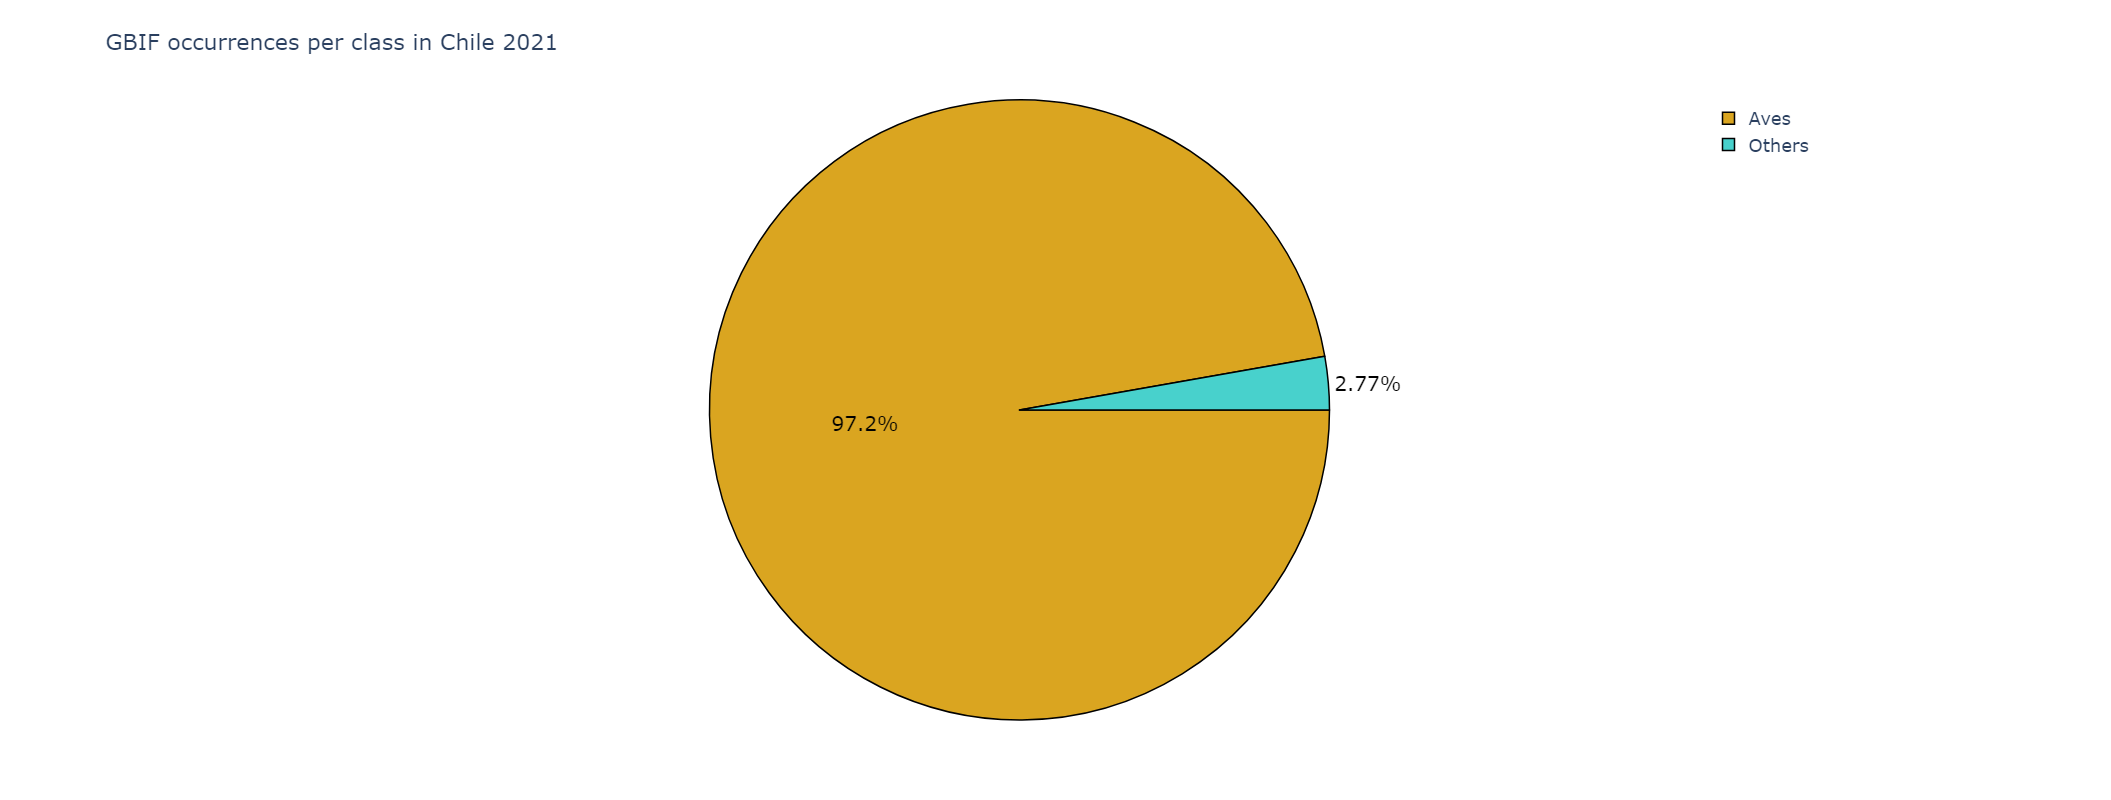

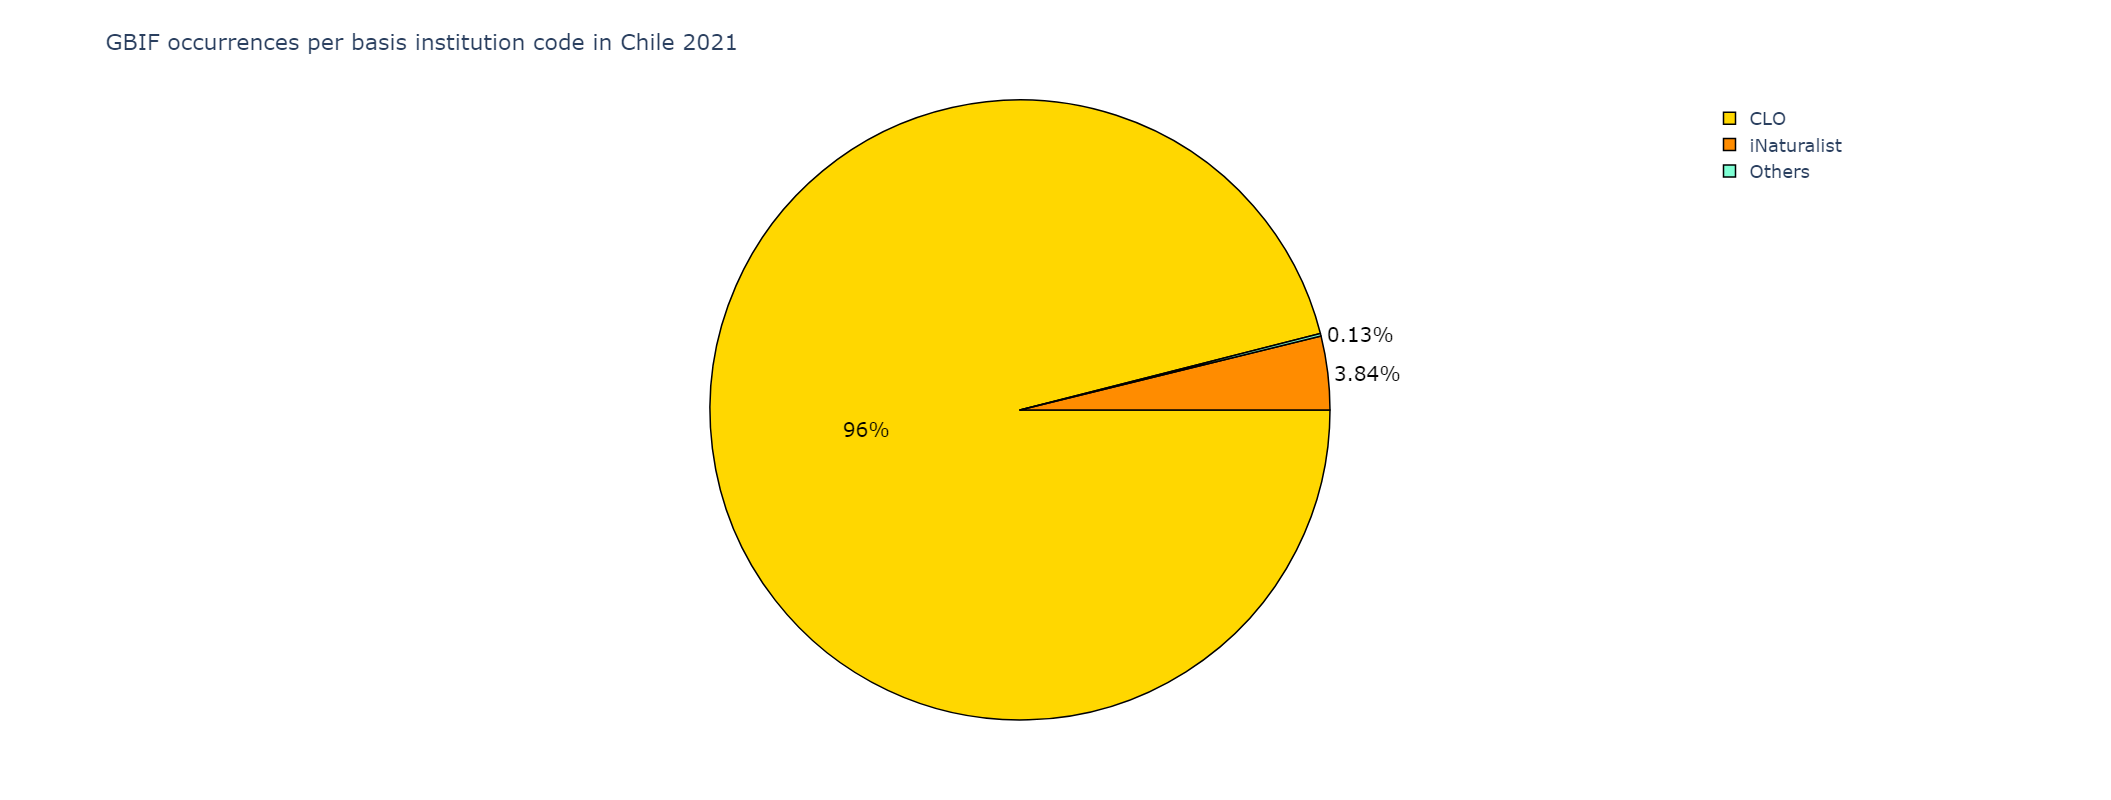

In [739]:
# Para hacer lo de abajo sin tener que hacer a mano not aves

# total_claa.loc[total_class['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
# fig = px.pie(df, values='pop', names='country', title='Population of European continent')
# fig.show()

# Y para que queden juntos en 1 plot 
#https://plotly.com/python/subplots/


colors = ['goldenrod', 'mediumturquoise']
labels = ['Aves','Others']
values = [int(aves_cities.sum()),int(notaves_cities.sum())]
fig2 = pg.Figure(data=[pg.Pie(labels=labels, values=values)])
fig2.update_traces(rotation=90, textinfo='percent', textfont_size=20, textfont_color='black', insidetextorientation='horizontal', marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig2.update_layout(showlegend=True, legend=dict(bordercolor='black',font=dict(size=18)), title_text="GBIF occurrences per class in Chile 2021", title_font_size=22, autosize=False, width=800, height=800) 
fig2.show()

colors3 = ['gold', 'darkorange', 'aquamarine']
labels3 = ['CLO','iNaturalist','Others']
values3 = [int(CLO_cites.sum()),int(inat_cities.sum()),int(ot_ins_cities.sum())]
fig4 = pg.Figure(data=[pg.Pie(labels=labels3, values=values3)])
fig4.update_traces(rotation=90, textinfo='percent', textfont_size=20, textfont_color='black', insidetextorientation='horizontal', marker=dict(colors=colors3, line=dict(color='#000000', width=1.5)))
fig4.update_layout(showlegend=True, legend=dict(bordercolor='black',font=dict(size=18)), title_text="GBIF occurrences per basis institution code in Chile 2021", title_font_size=22, autosize=False, width=800, height=800) 
fig4.show()


In [885]:
#Tabla clases totales (imprimir para documento)
class_total_frame = pd_cities['clase'].value_counts().rename_axis('Class').to_frame('Occurrences')
#class_total_frame['Occurrences'] = class_total_frame['Occurrences'].round(0)
class_total_frame['Percent'] = ((class_total_frame['Occurrences']/class_total_frame['Occurrences'].sum())*100)
class_total_frame.loc['Total']=class_total_frame.sum()
class_total_frame['Percent'] = class_total_frame['Percent'].round(3).astype(str) + '%'

#class_total_frame.style.to_latex(columns=['Class','Occurrences','%'], )
#class_total_frame.to_csv('C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Output_csv\totalclass.csv)
class_total_frame
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_latex.html

class_total_frame.to_csv(path_or_buf=r'C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Outputs_csv', sep=',')


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Mariana\\Google Drive\\Doctorado\\BD_resili\\Outputs_csv'

In [883]:
class_total_frame.to_latex(label='Total occurrences per class')

C:\Users\Mariana\AppData\Local\Temp\ipykernel_32884\615479928.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



'\\begin{table}\n\\centering\n\\label{Total occurrences per class}\n\\begin{tabular}{lrl}\n\\toprule\n{} &  Occurrences &  Percent \\\\\nClass             &              &          \\\\\n\\midrule\nAves              &     170933.0 &  97.227\\% \\\\\nMagnoliopsida     &       2054.0 &   1.168\\% \\\\\nInsecta           &        639.0 &   0.363\\% \\\\\nLiliopsida        &        552.0 &   0.314\\% \\\\\nGastropoda        &        185.0 &   0.105\\% \\\\\nMalacostraca      &        173.0 &   0.098\\% \\\\\nReptilia          &        157.0 &   0.089\\% \\\\\nPolychaeta        &        143.0 &   0.081\\% \\\\\nAgaricomycetes    &        121.0 &   0.069\\% \\\\\nArachnida         &        109.0 &   0.062\\% \\\\\nBivalvia          &         87.0 &   0.049\\% \\\\\nMammalia          &         86.0 &   0.049\\% \\\\\nPolypodiopsida    &         80.0 &   0.046\\% \\\\\nAnthozoa          &         76.0 &   0.043\\% \\\\\nAsteroidea        &         68.0 &   0.039\\% \\\\\nPolyplacophora    &   

In [216]:
#Gráfico ocurrencias clase antiguo! borrar cuando esté todo ok

# fig2, ax2 = plt.subplots()
# colors=['cadetblue','black']
# labels = ['Aves','Others']
# sizes = [int(aves_cities.sum()),int(notaves_cities.sum())]
# wedges, texts, pcts =ax2.pie(sizes,labels=labels,autopct='%1.1f%%',colors = colors) #https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# plt.setp(pcts, color='white', fontweight='bold',size=12)
# ax2.set_title("GBIF occurrences per class in Chile 2021")
# ax2.legend(labels, title="Occurrences per class",loc='lower left')
# plt.tight_layout()
# plt.savefig("GBIFChile2021.png",format='png')
# plt.show()


#Gráfico de clases no aves. No se ve bien y no entrega info relevante, pero lo dejaré por si acaso sea bueno mostrarlo

#notaves_cities_f = pd.DataFrame(notaves_cities)
#fig3, ax3 = plt.subplots()
#labels3 = notaves_cities_f.index.tolist()
#sizes3 = notaves_cities_f.clase.tolist()
#ax3.pie(sizes3, labels=labels3, autopct='%1.1f%%')
#ax3.legend(title="Occurrences per class excluding Aves in Chile 2021", loc='right')          
#plt.show()

#así se debería graficar para que no aparezcan muchos textos
# df = px.data.gapminder().query("continent == 'Asia'")
# fig = px.pie(df, values='pop', names='country')
# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
# fig.show()


#MÁS TABLAS O GRÁFICOS QUE SACAR??

#pd_cities.query('ciudad=="Tocopilla"').query('clase=="Magnoliopsida"')

#Esto es mejor como violinplot AUNQUE NO CACHO CÓMO HACERLO
#y = pd_cities['decimalLatitude'].tolist() #tendré que ordenarla de menor a mayor? #también para encontrar min y max pd_cities.decimalLatitude.min()
#fig = plt.violinplot(y,pd_cities['verbatimScientificName'].valuecounts()) #algo así??
#fig = plt.violinplot(y,pd_cities['verbatimScientificName'])
#fig.show()
# Con plotly express no entiendo cuál es el x https://plotly.com/python/violin/#violin-plot-with-plotly-express
# Tengo importado matplotlib, pero no hay algún ejemplo
# Estaba viendo este video https://www.youtube.com/watch?v=W0MufH1eOs8

## BD index calculation

#### BD data per city (all classes)

In [811]:
#BD Data for each city

dfs = {}
ciudades = pd_cities.ciudad.unique()
output_df = {}
occurrence = {}
n_especies = {}
especies = {}
for city in ciudades:
    dfs[city] = pd_cities.query('ciudad==@city') #pd_cities[pd_cities['ciudad']==city] #DataFrame por ciudad
    
    n_especies[city] = dfs[city]['verbatimScientificName'].nunique() #Species richness por ciudad
    especies[city] = dfs[city]['verbatimScientificName'].value_counts().reset_index() #Species richness por ciudad

    especies[city]['pi'] = especies[city]['verbatimScientificName']/dfs[city].shape[0]
    especies[city]['pi_x_logpi'] = especies[city].eval('pi*log(pi)')
    especies[city]['pi_square'] = especies[city].eval('pi*pi')
    
    #Output especies
    #Occurrence
    occurrence = dfs[city].shape[0] 
    #Shannon-Weiner
    sw = round(-1*especies[city]['pi_x_logpi'].sum(),3)
    #Gini-Simpson
    gs = round(1-(especies[city]['pi_square'].sum()),3)
    #Hmax
    hmax = round(np.log(n_especies[city]),3)
    #Pielou
    pl = round((sw/hmax),3)
    
    output_df[city] = pd.DataFrame({'city': [city],'occurrence':[occurrence], 'shannon-weiner': [sw], 'gini-simpson': [gs], 'pielou': [pl]})
    
output_frame = pd.concat(output_df).reset_index(drop=True)
del output_frame['shannon-weiner']
output_frame

city  occurrence  gini-simpson  pielou
0                         Algarrobo        6139         0.982   0.791
1                             Ancud        1343         0.979   0.895
2                       Antofagasta        4270         0.970   0.756
3                       San Antonio       14573         0.985   0.820
4                            Arauco         291         0.979   0.912
5                             Arica       15091         0.977   0.815
6                           Caldera        2436         0.973   0.821
7                         Carelmapu          40         0.945   0.984
8                         Cartagena       10006         0.980   0.814
9                          Chañaral          46         0.960   0.978
10                       Cobquecura         703         0.980   0.884
11                           Concón        4734         0.981   0.826
12                     Constitución        2079         0.978   0.862
13                         Coquimbo       10973         0.982   0.759
14                          Coronel         994         0.985   0.868
15                           Corral         303         0.950   0.855
16                    Santo Domingo        8917         0.985   0.848
17                      Guanaqueros        2572         0.966   0.809
18                        Hanga Roa           8         0.875   1.000
19                          Hualpén         959         0.979   0.851
20                           Huasco         639         0.981   0.893
21                            Iloca          16         0.938   1.000
22                          Iquique        1100         0.955   0.839
23                             Lebu          21         0.930   0.979
24                        Los Vilos         159         0.977   0.949
25                             Lota         548         0.969   0.856
26                      Bahía Mansa         378         0.974   0.896
27                          Maullín         156         0.959   0.914
28                       Mejillones        1374         0.968   0.852
29                           Niebla        7965         0.975   0.797
30                           Papudo         546         0.984   0.915
31                            Penco        2229         0.986   0.837
32                      Pichidangui         790         0.977   0.886
33                        Pichilemu        3876         0.986   0.890
34                           Queule         122         0.968   0.949
35                          Quidico          25         0.944   0.982
36                         Quintero        1637         0.984   0.876
37                        El Quisco        5693         0.979   0.750
38                  Puerto Saavedra         691         0.979   0.887
39              San Pedro de La Paz        2813         0.982   0.803
40                        La Serena        9871         0.981   0.757
41                          El Tabo        5408         0.982   0.786
42                       Talcahuano        4800         0.986   0.804
43                           Taltal         197         0.965   0.916
44                            Tirúa          88         0.972   0.967
45                        Tocopilla           7         0.816   0.975
46                             Tomé        1295         0.984   0.850
47                           Tongoy        5247         0.975   0.820
48                    Caleta Tumbes          98         0.984   0.981
49                       Valparaíso        9342         0.958   0.718
50  Las Ventanas-Horcón-Maitencillo        5951         0.982   0.848
51                     Viña del Mar       12481         0.967   0.679
52                         Zapallar        3779         0.984   0.814

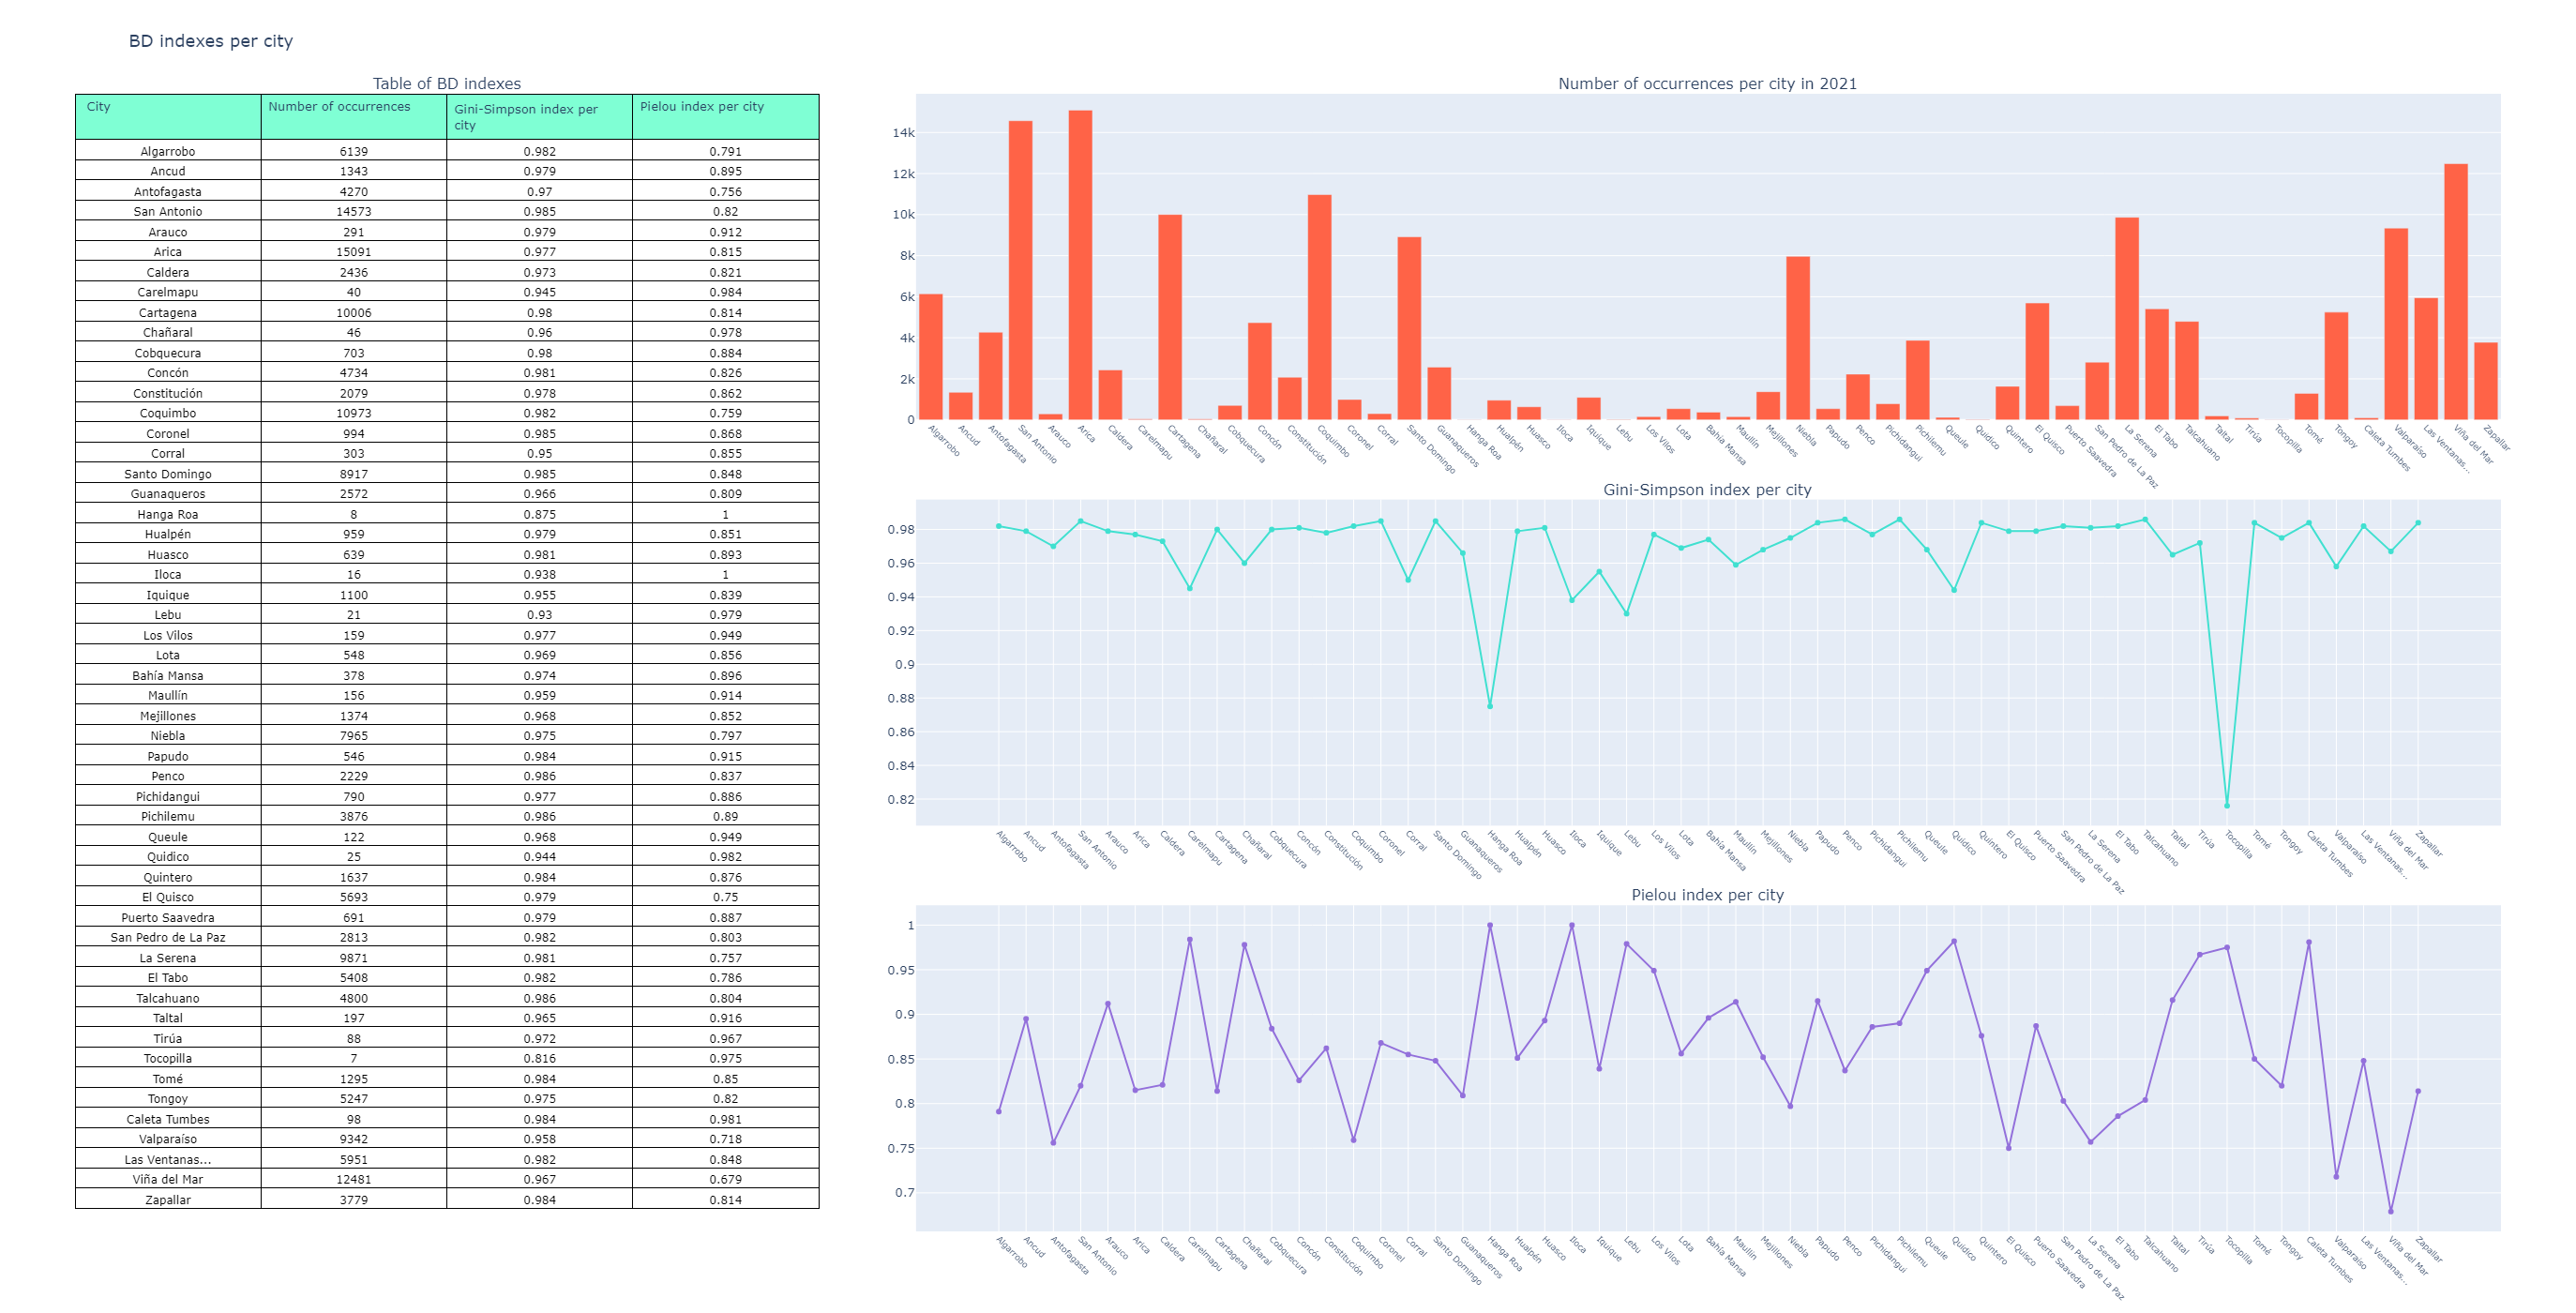

In [812]:
# Graph BD data
fig = make_subplots(
    rows=3, cols=3,
    shared_xaxes=True,
    vertical_spacing=0.07,
    horizontal_spacing=0.04,
    specs = [
    [{"rowspan" : 3, "type": "table"}, {"colspan" : 2, "type": "bar"}, {"type": "bar"}],
    [{"type": "table"}, {"colspan" : 2, "type":"scatter"}, {"type":"scatter"}], 
    [{"type": "table"}, {"colspan" : 2, "type":"scatter"}, {"type":"scatter"}]]
    , subplot_titles=("Table of BD indexes", "Number of occurrences per city in 2021", '','', "Gini-Simpson index per city",'','', "Pielou index per city",'')
    )


output_frame_ = output_frame.replace({'Las Ventanas-Horcón-Maitencillo':'Las Ventanas...'})
city = output_frame_['city']
occurrence = output_frame_['occurrence']
gini = output_frame_["gini-simpson"]
pielou = output_frame_["pielou"]
                          


fig.add_trace(
    pg.Table(header=dict(values=[" City ", "Number of occurrences", "Gini-Simpson index per city","Pielou index per city"],font=dict(size=15),align="left",line_color='black',fill_color='aquamarine'),
             cells=dict(values=[output_frame_[k].tolist() for k in output_frame.columns[0:]], font=dict(size=12, color='black'), line_color='black', fill_color='white', align = "center",height=21.5)), 
            row=1, col=1)

    
fig.add_trace(
    pg.Bar(x=city, y=occurrence, name="Total occurrences per city",marker=dict(color="tomato")),
    row=1, col=2)

#fig.add_hline(y=float(output_frame["occurrence"].mean())


# fig.add_trace(
#     pg.Scatter(x=output_frame["city"], y=output_frame["occurrence"], mode="lines", name="total occurrences per city", showlegend=True),
#     row=2, col=1)     


fig.add_trace(
    pg.Scatter(x=output_frame_["city"], y=output_frame_["gini-simpson"], mode="lines+markers", name="Gini-Simpson index per city", marker=dict(color="turquoise", size=6)),
    row=2, col=2)

# fig.add_trace(
#     pg.Bar(x=city, y=gini, name="Gini-Simpson index per city"),
#     row=3, col=1)

fig.add_trace(
     pg.Scatter(x=output_frame_["city"], y=output_frame_["pielou"], mode="lines+markers", name="Pielou index per city", marker=dict(color="mediumpurple", size=6)),
     row=3, col=2)

fig.update_xaxes(tickangle=45, tickfont_size=9)
# fig.add_trace(
#     pg.Bar(x=city, y=pielou, name="Pielou index per city"),
#     row=4, col=1)


#fig.update_layout(height=1100, font_size=12, title_text="BD indexes per city",showlegend=True)
fig.update_layout(height=1400, font_size=13, title_text="BD indexes per city",showlegend=False)

fig.show()

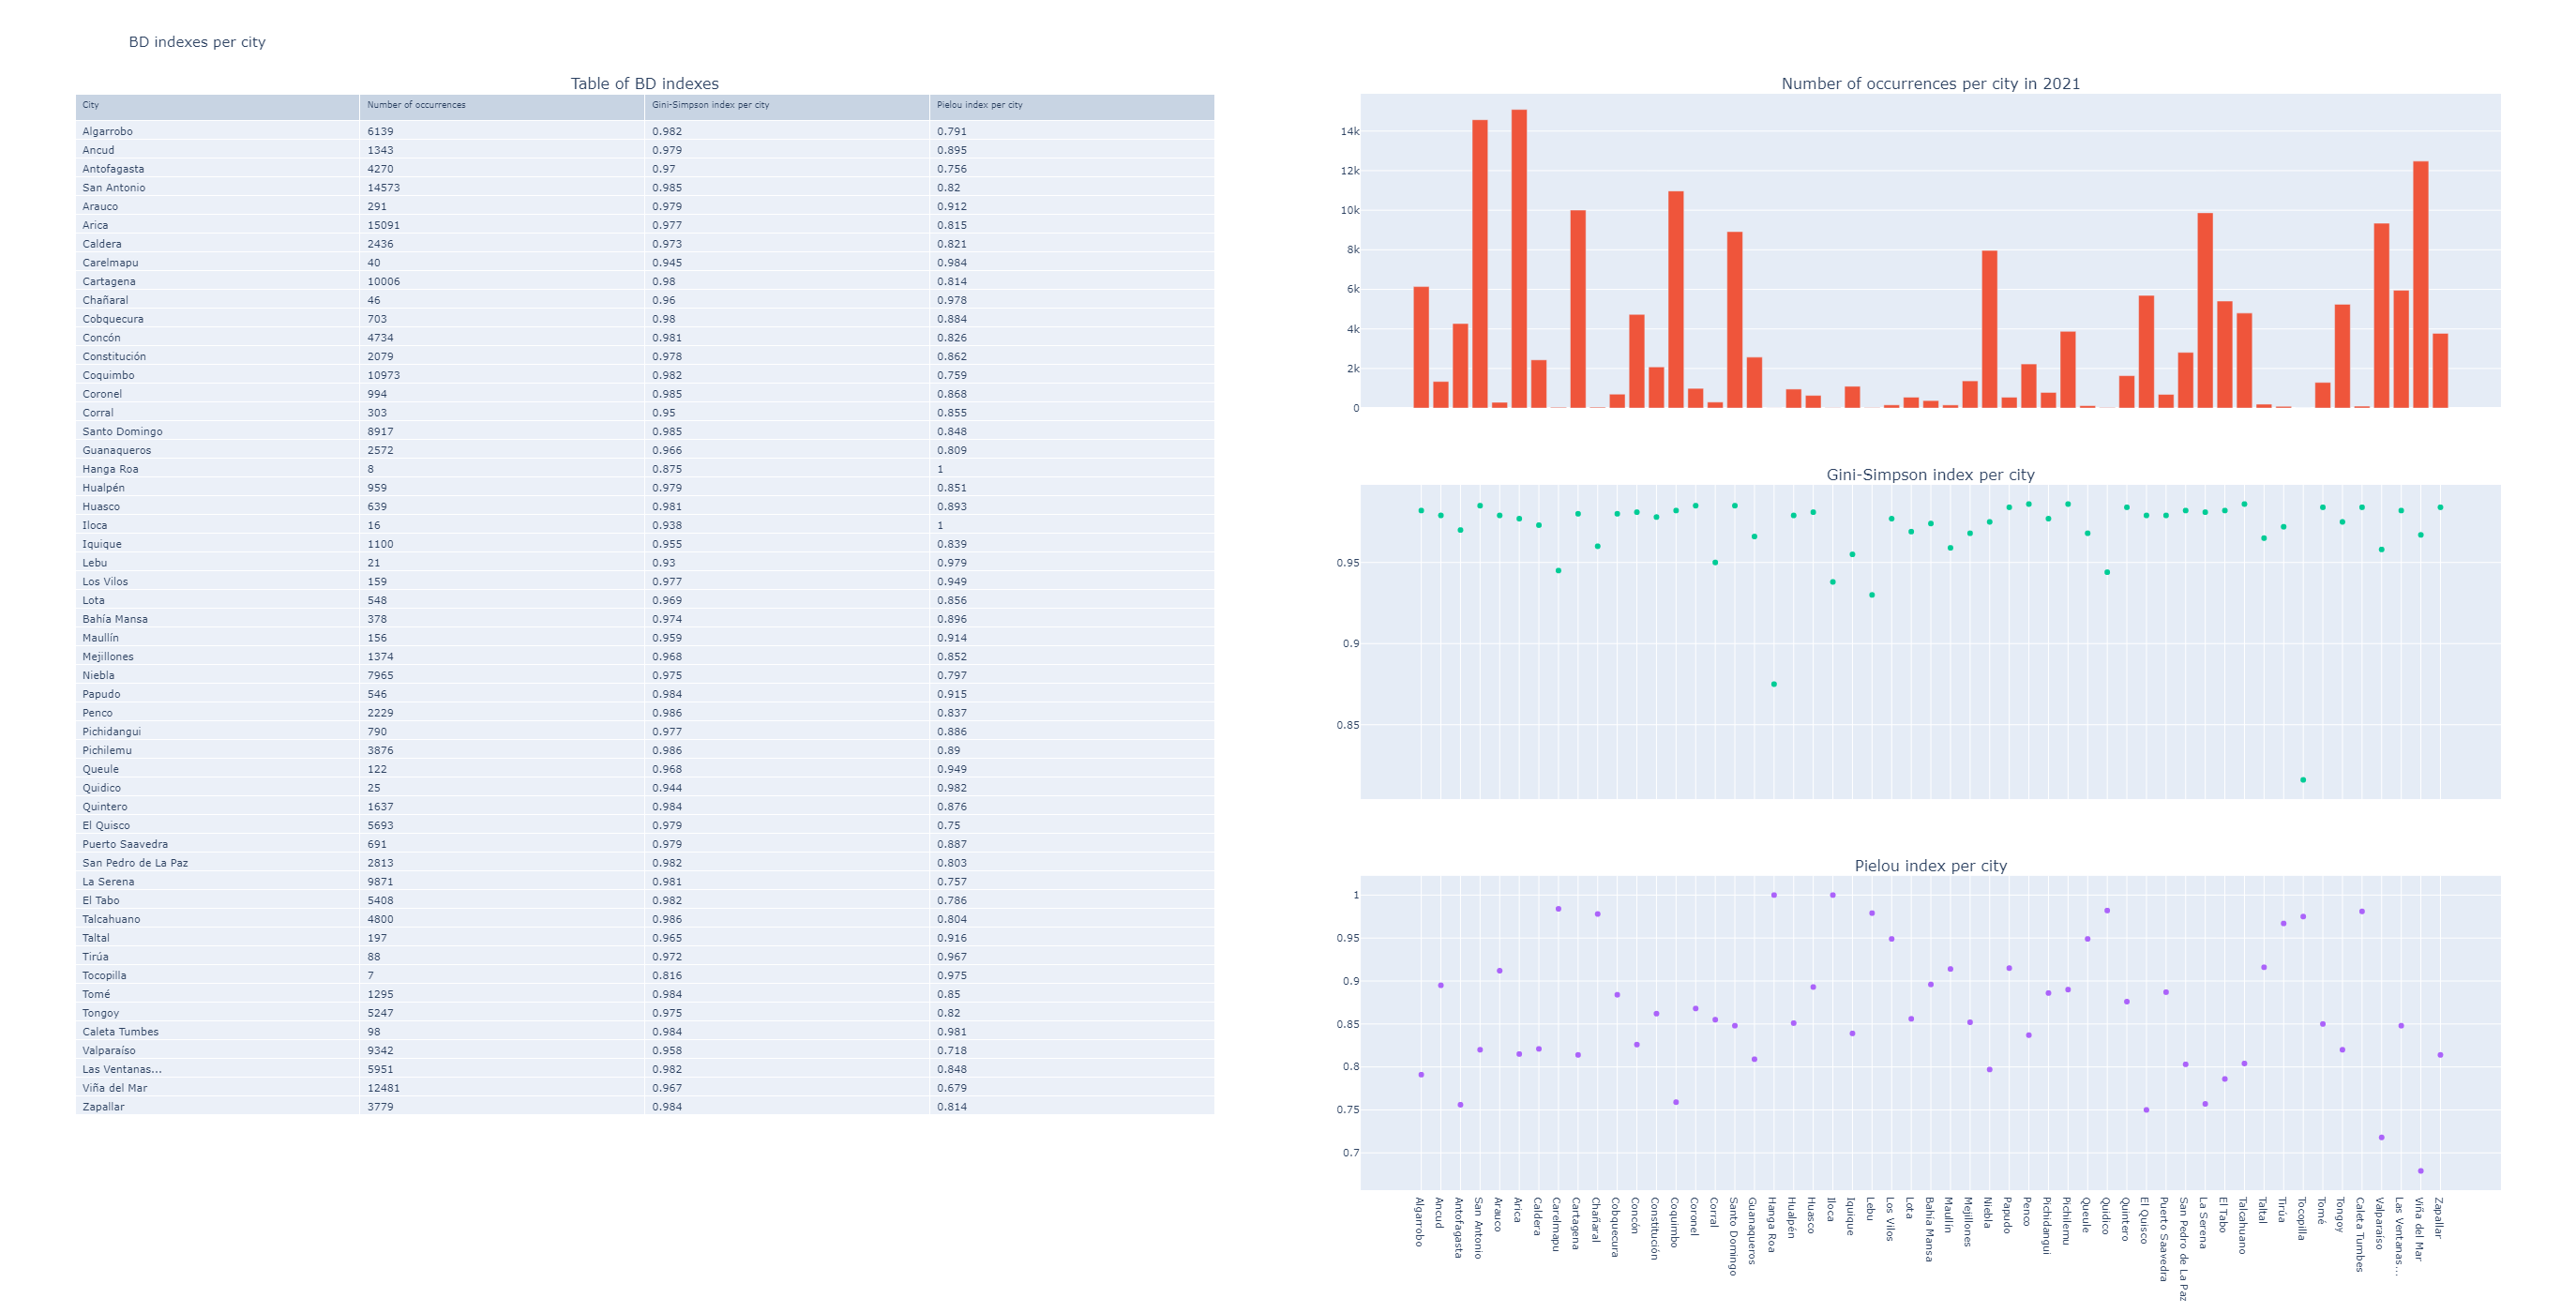

In [813]:
# Graph BD data no tan bonito
fig = make_subplots(
    rows=3, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.07,
    horizontal_spacing=0.06,
    specs = [
    [{"rowspan" : 3, "type": "table"}, {"type": "bar"}],
    [{"type": "table"}, {"type":"scatter"}], 
    [{"type": "table"}, {"type":"scatter"}]
    ]
#        [{"rowspan":3},{},{"type":"table"}], 
#        [None,{},{"type": "bar"}],
#        [None,{},{"type": "scatter"}]],
    , subplot_titles=("Table of BD indexes", "Number of occurrences per city in 2021", '', "Gini-Simpson index per city",'', "Pielou index per city")
    )


output_frame_ = output_frame.replace({'Las Ventanas-Horcón-Maitencillo':'Las Ventanas...'})
city = output_frame_['city']
occurrence = output_frame_['occurrence']
gini = output_frame_["gini-simpson"]
pielou = output_frame_["pielou"]
                          


fig.add_trace(
    pg.Table(header=dict(values=["City", "Number of occurrences", "Gini-Simpson index per city","Pielou index per city"],
    font=dict(size=9),align="left"), cells=dict(values=[output_frame_[k].tolist() for k in output_frame.columns[0:]],
    align = "left")), row=1, col=1)

    
fig.add_trace(
    pg.Bar(x=city, y=occurrence, name="Total occurrences per city"),
    row=1, col=2)
#fig.add_hline(y=float(output_frame["occurrence"].mean())


# fig.add_trace(
#     pg.Scatter(x=output_frame["city"], y=output_frame["occurrence"], mode="lines", name="total occurrences per city", showlegend=True),
#     row=2, col=1)     


fig.add_trace(
    pg.Scatter(x=output_frame_["city"], y=output_frame_["gini-simpson"], mode="markers", name="Gini-Simpson index per city"),
    row=2, col=2)

# fig.add_trace(
#     pg.Bar(x=city, y=gini, name="Gini-Simpson index per city"),
#     row=3, col=1)

fig.add_trace(
     pg.Scatter(x=output_frame_["city"], y=output_frame_["pielou"], mode="markers", name="Pielou index per city"),
     row=3, col=2)

# fig.add_trace(
#     pg.Bar(x=city, y=pielou, name="Pielou index per city"),
#     row=4, col=1)


#fig.update_layout(height=1100, font_size=12, title_text="BD indexes per city",showlegend=True)
fig.update_layout(height=1400, font_size=11, title_text="BD indexes per city",showlegend=False)

fig.show()

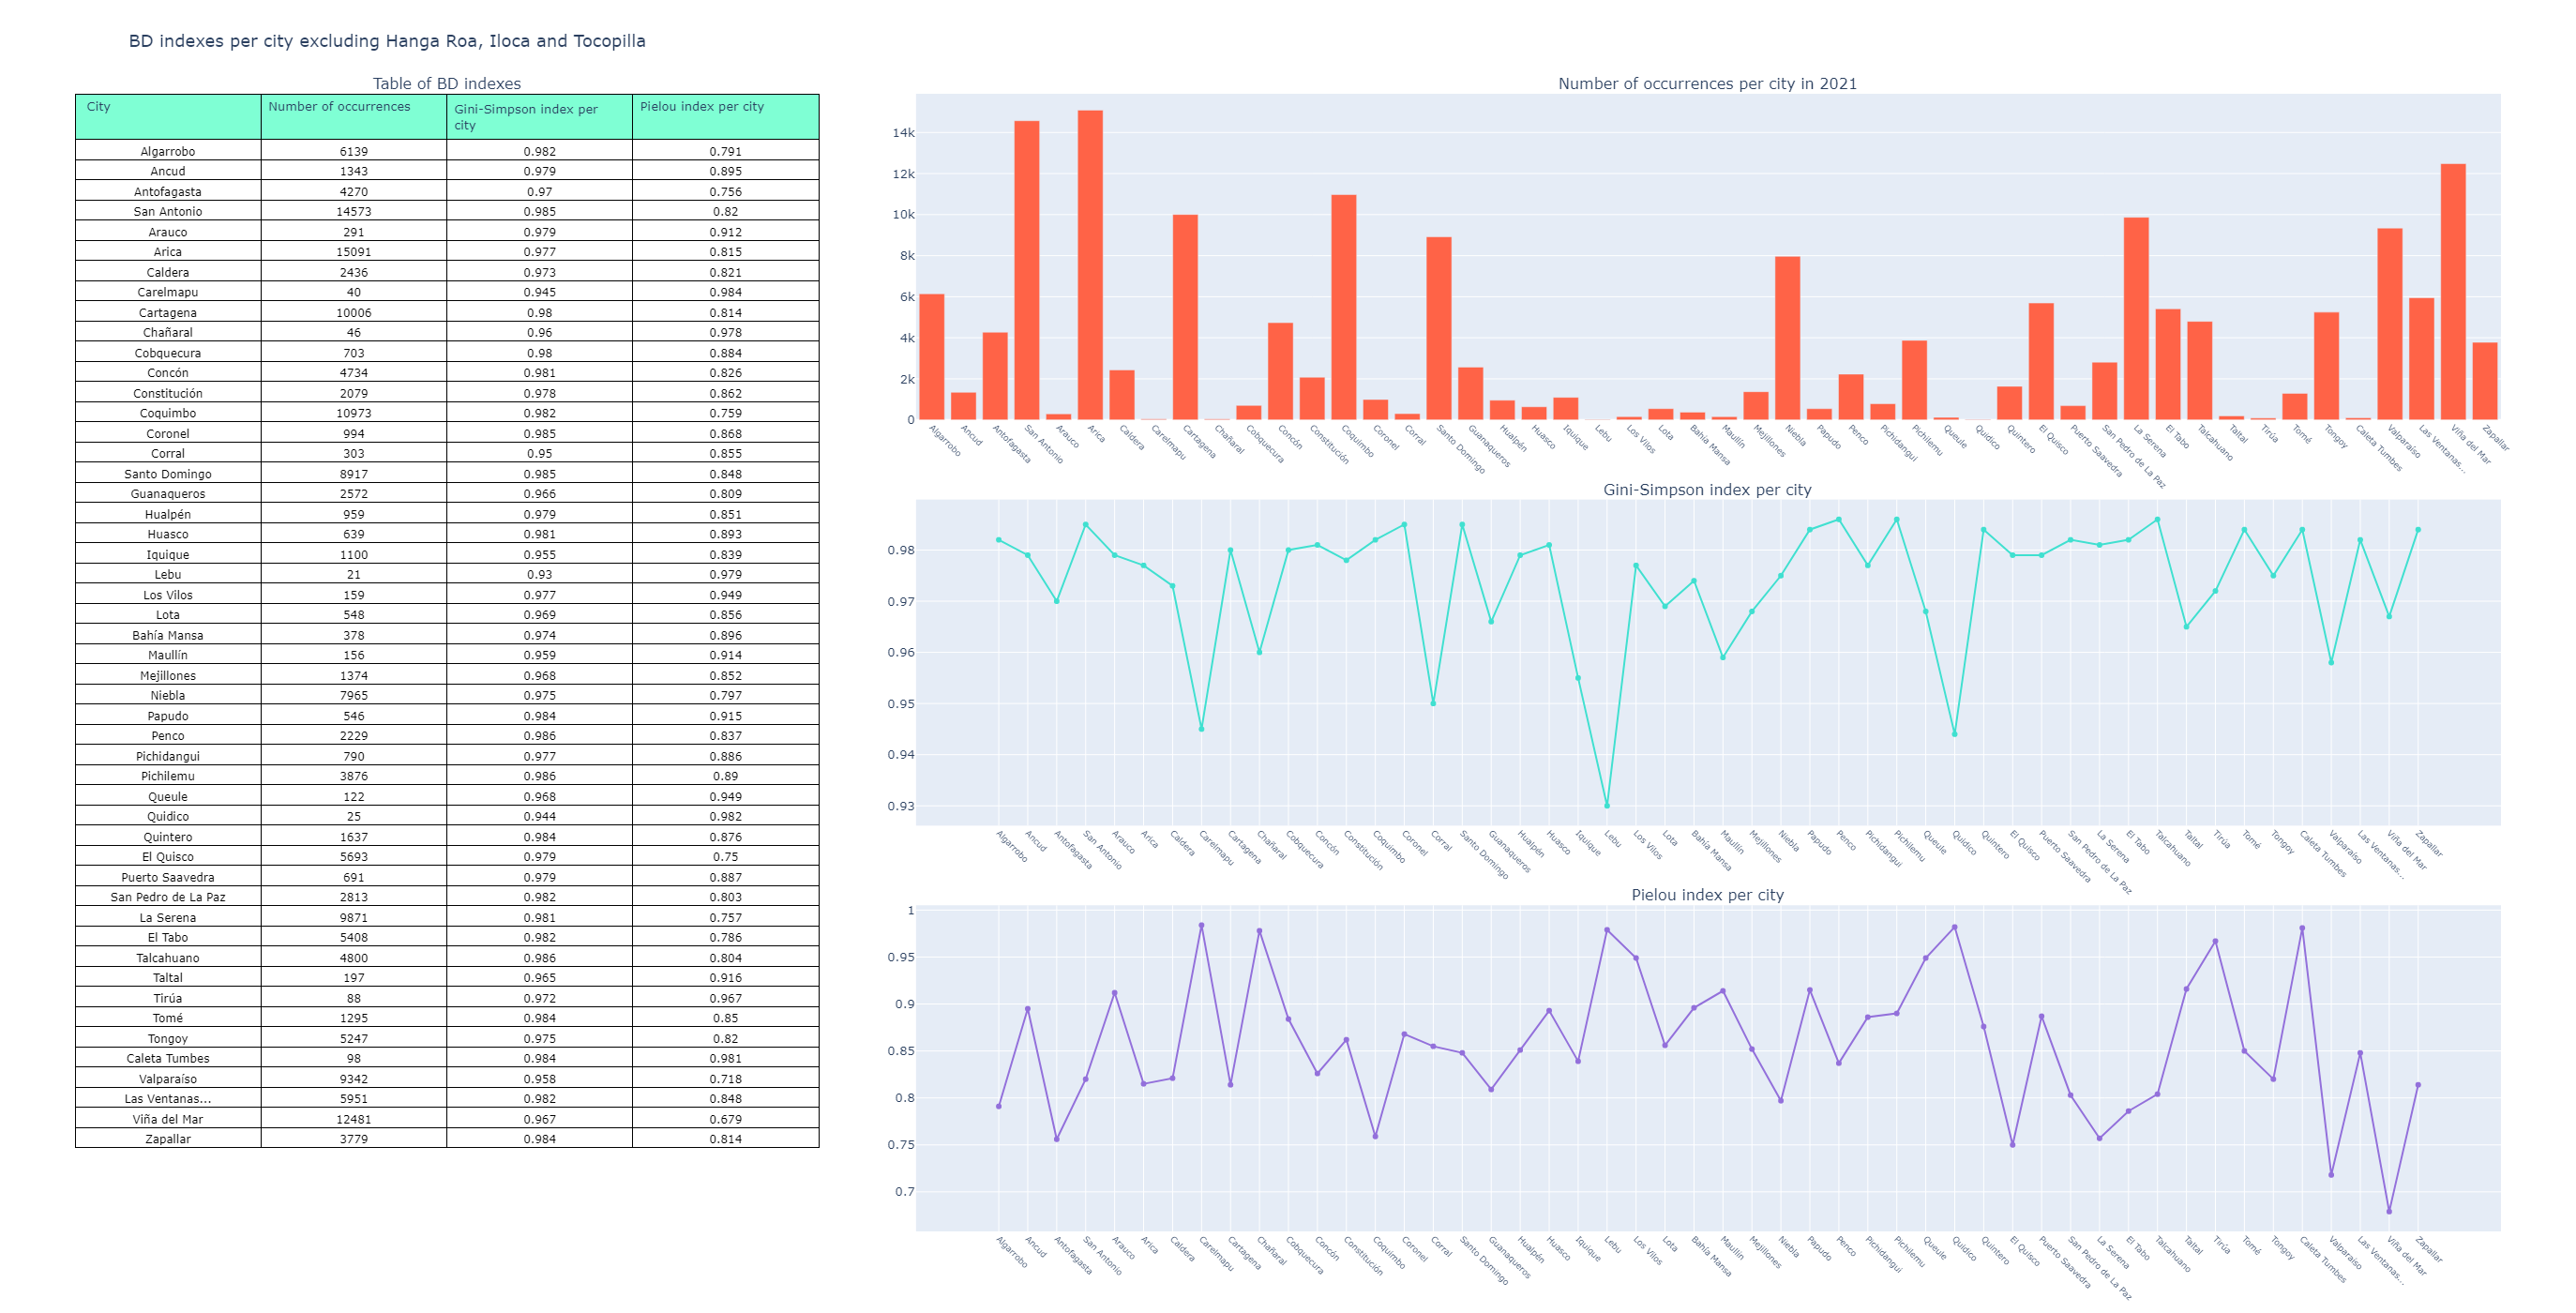

In [815]:
# Graph BD sin 3 ciudades

outc = ['Hanga Roa', 'Tocopilla', 'Iloca'] # intentar que lo saque autom
out_filc = output_frame_.loc[~output_frame_['city'].isin(out)]

fig = make_subplots(
    rows=3, cols=3,
    shared_xaxes=True,
    vertical_spacing=0.07,
    horizontal_spacing=0.04,
    specs = [
    [{"rowspan" : 3, "type": "table"}, {"colspan" : 2, "type": "bar"}, {"type": "bar"}],
    [{"type": "table"}, {"colspan" : 2, "type":"scatter"}, {"type":"scatter"}], 
    [{"type": "table"}, {"colspan" : 2, "type":"scatter"}, {"type":"scatter"}]]
    , subplot_titles=("Table of BD indexes", "Number of occurrences per city in 2021", '','', "Gini-Simpson index per city",'','', "Pielou index per city",'')
    )


#out_filc = out_filc.replace({'Las Ventanas-Horcón-Maitencillo':'Las Ventanas...'})
city = out_filc['city']
occurrence = out_filc['occurrence']
gini = out_filc["gini-simpson"]
pielou = out_filc["pielou"]
                          


fig.add_trace(
    pg.Table(header=dict(values=[" City ", "Number of occurrences", "Gini-Simpson index per city","Pielou index per city"],font=dict(size=13),align="left",line_color='black',fill_color='aquamarine'),
             cells=dict(values=[out_filc[k].tolist() for k in out_filc.columns[0:]], font=dict(size=12, color='black'), line_color='black', fill_color='white', align = "center",height=21.5)), 
            row=1, col=1)

    
fig.add_trace(
    pg.Bar(x=city, y=occurrence, name="Total occurrences per city",marker=dict(color="tomato")),
    row=1, col=2)

#fig.add_hline(y=float(output_frame["occurrence"].mean())


# fig.add_trace(
#     pg.Scatter(x=output_frame["city"], y=output_frame["occurrence"], mode="lines", name="total occurrences per city", showlegend=True),
#     row=2, col=1)     


fig.add_trace(
    pg.Scatter(x=out_filc["city"], y=out_filc["gini-simpson"], mode="lines+markers", name="Gini-Simpson index per city", marker=dict(color="turquoise", size=6)),
    row=2, col=2)

# fig.add_trace(
#     pg.Bar(x=city, y=gini, name="Gini-Simpson index per city"),
#     row=3, col=1)

fig.add_trace(
     pg.Scatter(x=out_filc["city"], y=out_filc["pielou"], mode="lines+markers", name="Pielou index per city", marker=dict(color="mediumpurple", size=6)),
     row=3, col=2)

fig.update_xaxes(tickangle=45, tickfont_size=9)
# fig.add_trace(
#     pg.Bar(x=city, y=pielou, name="Pielou index per city"),
#     row=4, col=1)


#fig.update_layout(height=1100, font_size=12, title_text="BD indexes per city",showlegend=True)
fig.update_layout(height=1400, font_size=13, title_text="BD indexes per city excluding Hanga Roa, Iloca and Tocopilla",showlegend=False)

fig.show()

In [728]:
output_frame.keys()

Index(['city', 'occurrence', 'gini-simpson', 'pielou'], dtype='object')

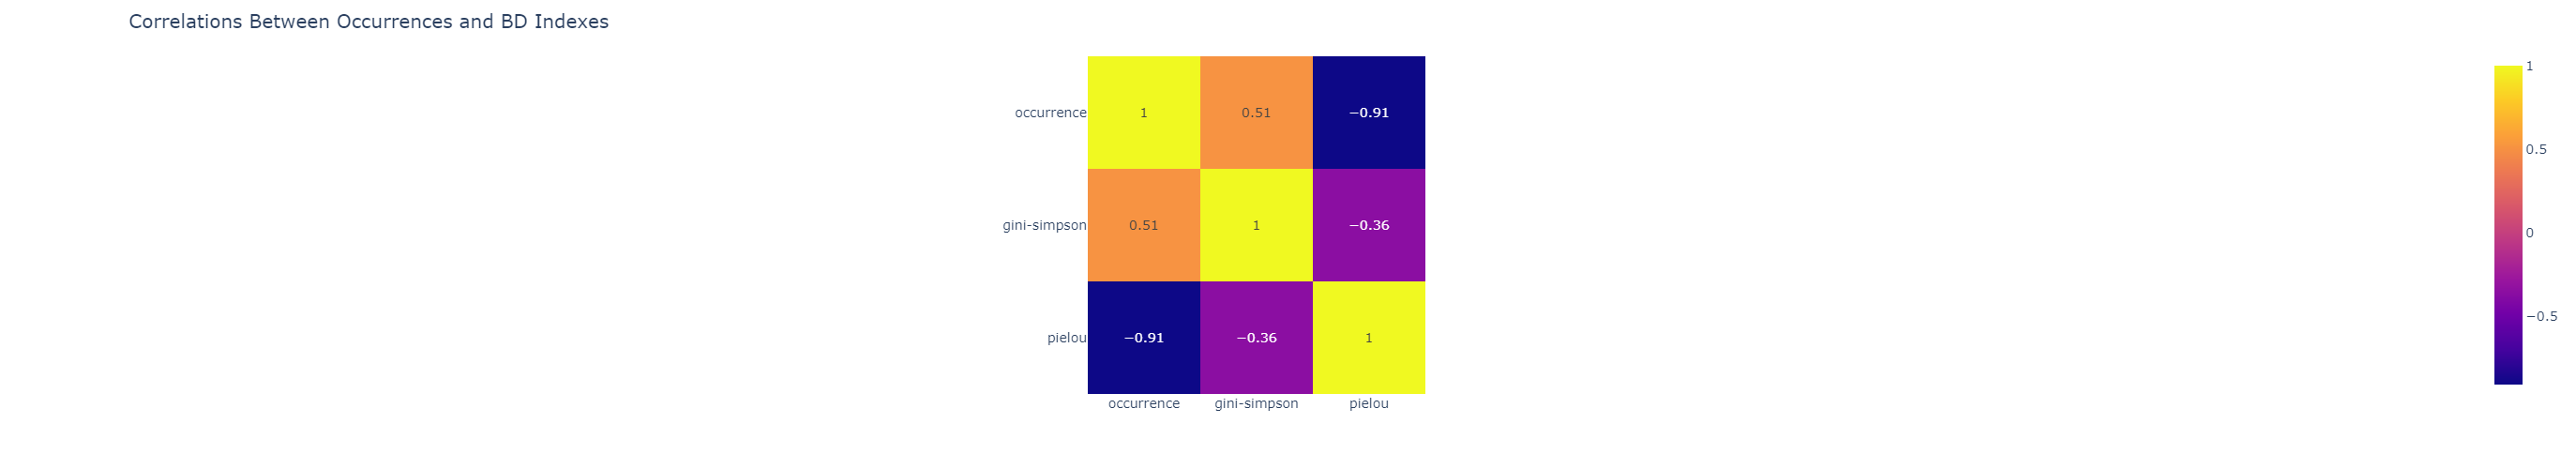

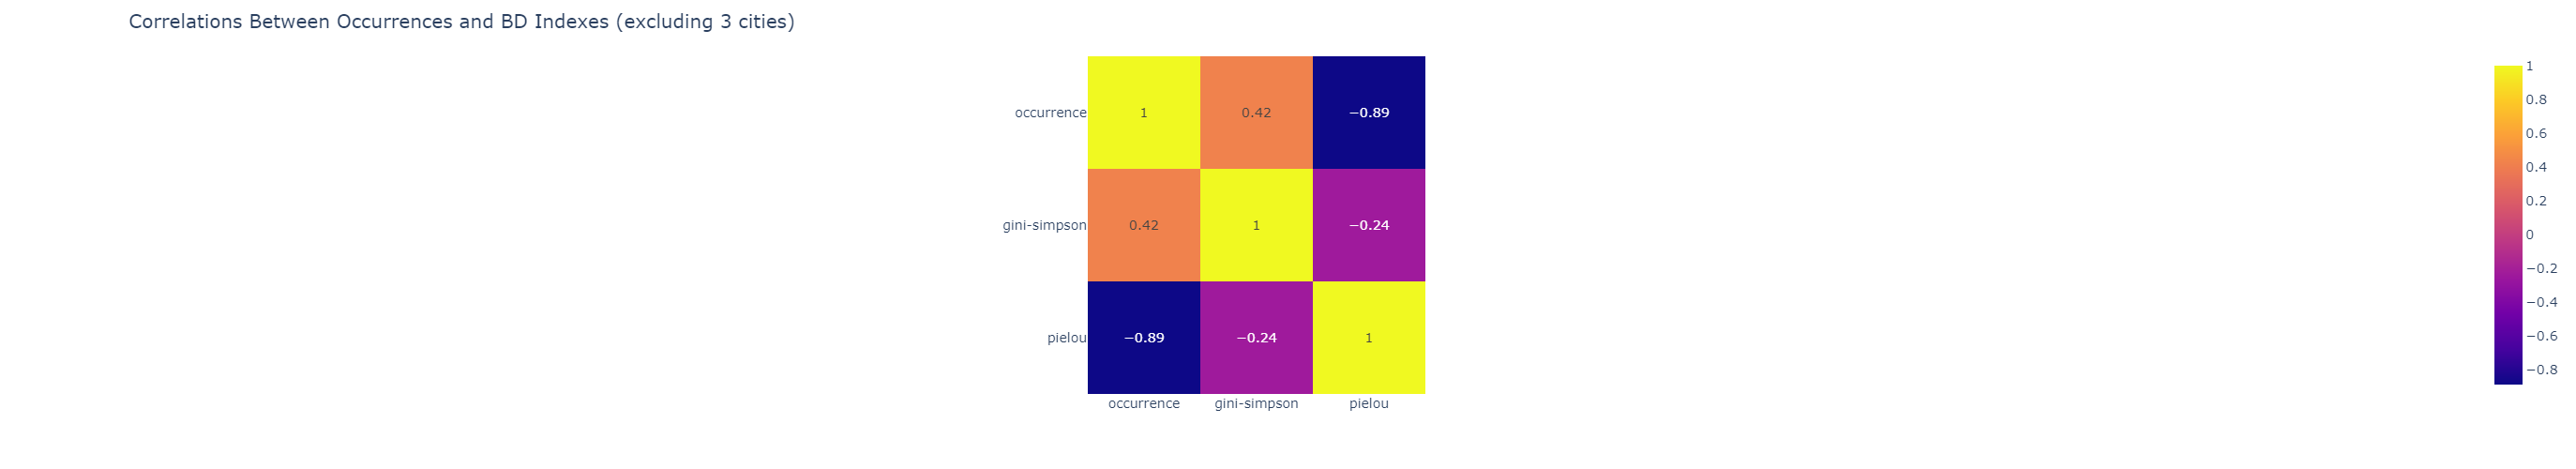

In [805]:
#Correlations
output_frame_corr = output_frame
corr_columnas= ['occurrence', 'gini-simpson', 'pielou']
#for col in corr_columnas:
#    output_frame_a_corr[col] = output_frame_a_corr[col].replace('-', np.nan).astype(float)
#    output_frame_corr[col] = output_frame_corr[col].astype(float)

    
output_frame_corr = output_frame_corr[corr_columnas].corr(method='spearman').round(2)
fig = px.imshow(output_frame_corr, text_auto=True)
fig.update_layout(height=500,title_text='Correlations Between Occurrences and BD Indexes',font_size=14)

fig.show()

output_frame_corr_fil = out_filc
output_frame_corr_fil = output_frame_corr_fil[corr_columnas].corr(method='spearman').round(2)
fig2 = px.imshow(output_frame_corr_fil, text_auto=True)
fig2.update_layout(height=500,title_text='Correlations Between Occurrences and BD Indexes (excluding 3 cities)',font_size=14)

fig2.show()

#Correlation between BD indexes and between BD indexes and occurrences do not change for excluding lower data (occurrences) cities. ¿¿¿Counterintuitively, correlation slightly decrease while excluding these cities. So having few occurrences may not imply ...? na pero la correlacón 

In [745]:
output_frame[output_frame['occurrence']==output_frame['occurrence'].min()]
#output_frame[output_frame['gini-simpson']==output_frame['gini-simpson'].min()]
#output_frame['gini-simpson'].min()

city  occurrence  gini-simpson  pielou
45  Tocopilla           7         0.816   0.975

In [804]:
out_filc[out_filc['pielou']==out_filc['pielou'].min()]

city  occurrence  gini-simpson  pielou
51  Viña del Mar       12481         0.967   0.679

In [746]:
output_frame.query('city=="Arica"')

city  occurrence  gini-simpson  pielou
5  Arica       15091         0.977   0.815

In [511]:
1 - (((39/40)*(39/40))+((1/40)*(1/40))*39)

0.025000000000000022

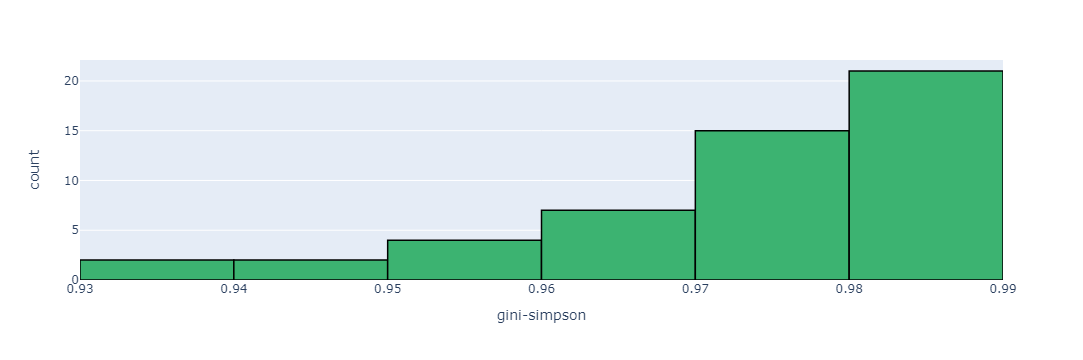

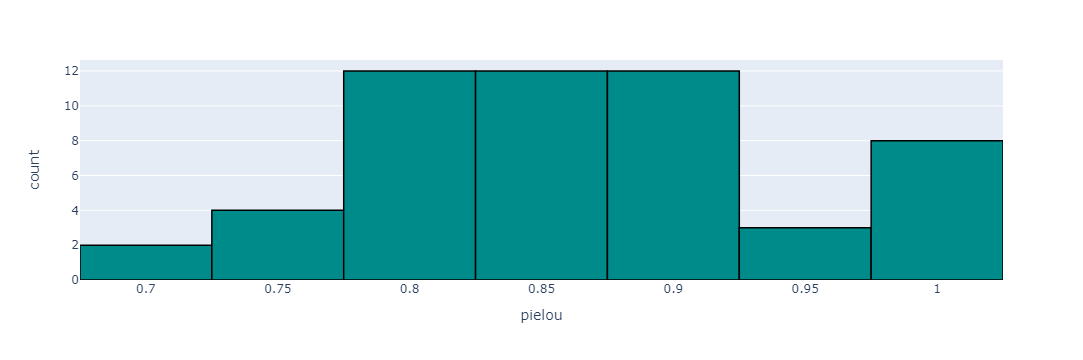

In [533]:
#histogramas


output_frame[output_frame['gini-simpson']<0.9].city
out = ['Hanga Roa', 'Tocopilla'] # intentar que lo saque autom
out_fil = output_frame.loc[~output_frame['city'].isin(out)]
fig = px.histogram(out_fil,x='gini-simpson')
fig.update_traces(marker_color='mediumseagreen', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')
fig.show()

fig2 = px.histogram(output_frame,x='pielou')
fig2.update_traces(marker_color='darkcyan', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')

fig2.show()

# plt.hist(especies['Algarrobo'].verbatimScientificName)
# #muchas especies ocurren solo una vez => eso explica Gini alto. más de 175 especies solo 1 vez

# plt.hist(output_frame['gini-simpson']) #la mayoría de las ciudades tienen un índice de gini alto

# plt.hist(output_frame['pielou']) #la mayoría de las ciudades tienen 



#output_frame[output_frame['gini-simpson']<0.9].city
#out = ['Hanga Roa', 'Tocopilla'] # intentar que lo saque autom
#out_fil = output_frame.loc[~output_frame['city'].isin(out)]



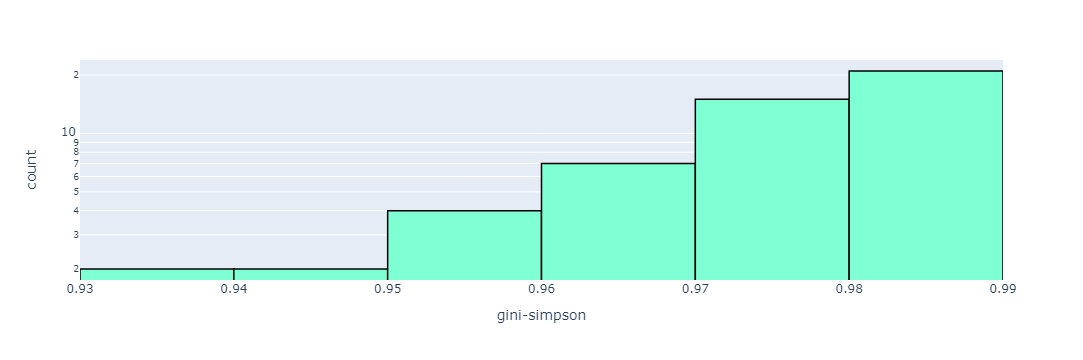

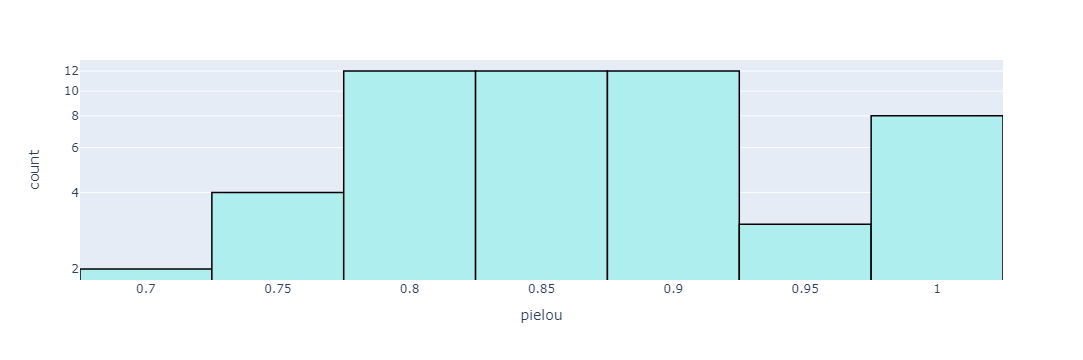

In [534]:
#histogramas log

fig3 = px.histogram(out_fil,x='gini-simpson',log_y=True)
fig3.update_traces(marker_color='aquamarine', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')
fig3.show()

fig4 = px.histogram(output_frame,x='pielou',log_y=True)
fig4.update_traces(marker_color='paleturquoise', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')

fig4.show()

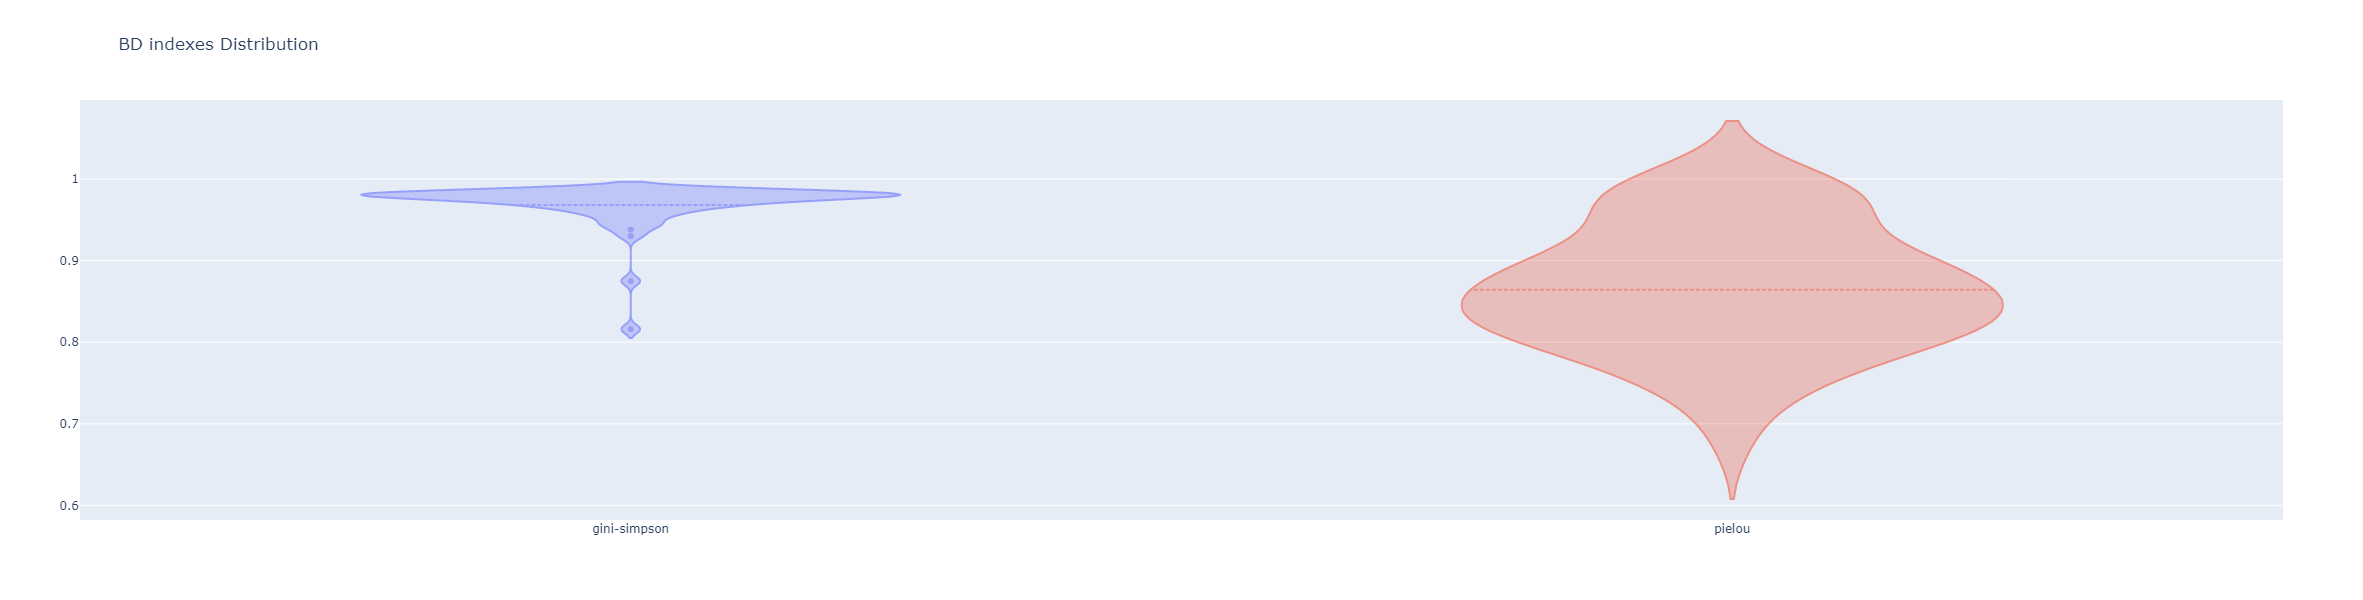

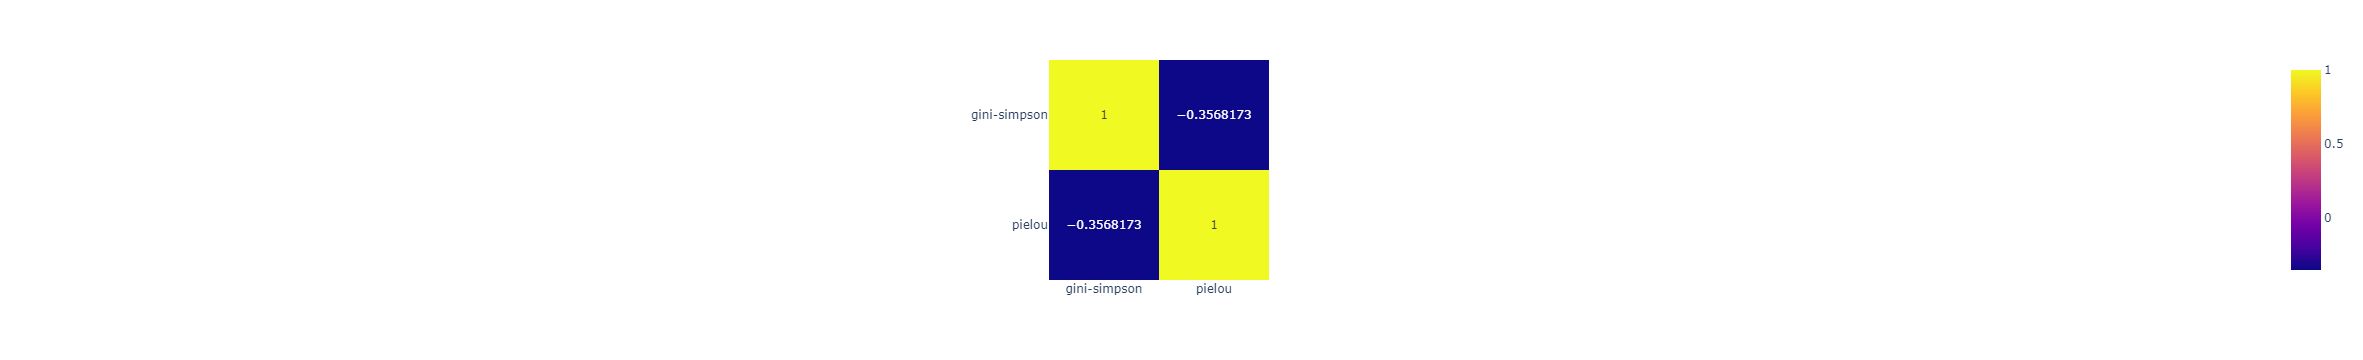

In [684]:
#histograma de los dos indicadores
fig = go.Figure()

bd_cols = ['gini-simpson','pielou']
for co in bd_cols:
    fig.add_trace(pg.Violin(y=output_frame[co],
                            meanline_visible=True, opacity=0.6, name=co))
fig.update_layout(showlegend=False, height=600, title_text='BD indexes Distribution')
fig.show()

#Gini-simpson podría no ser un buen indicador porque casi todas las ciudades tienen un gini cercano a 1 (hay solo 1 individio de cada especie)
output_frame_corr = output_frame
corr_colum_bd = ['gini-simpson','pielou']

for col in corr_colum_bd:
    output_frame_corr[col] = output_frame_corr[col].astype(float)

    
output_frame_corr = output_frame_corr[corr_colum_bd].corr(method='spearman').round(2)
fig2 = px.imshow(output_frame_corr, text_auto=True)
fig2.show()

### BD data per city (class Aves)

In [ ]:
#BD filum class filum for each city


In [494]:
#Aves BD Data for each city 

dfs_a = {}
ciudades_a = pd_cities.ciudad.unique()
output_df_a = {}
n_order_a = {}
n_family_a = {}
especies_a = {}
for city in ciudades:
    dfs_a[city] = pd_cities.query('ciudad==@city').query('clase=="Aves"').groupby('order')['family'].nunique().to_frame()
    n_order_a = len(dfs_a[city]) 
    n_family_a = dfs_a[city]['family'].sum()
    if n_family_a > 1: #debería ser un while, para que sea más corto
        dfs_a[city]['pi'] = dfs_a[city]['family']/(dfs_a[city]['family'].sum())
        dfs_a[city]['pi_x_logpi'] = dfs_a[city].eval('pi*log(pi)')
        dfs_a[city]['pi_square'] = dfs_a[city].eval('pi*pi')
        sw_a = round(-1*dfs_a[city]['pi_x_logpi'].sum(),3)
        gs_a = round(1-(dfs_a[city]['pi_square'].sum()),3)
        hmax_o_a = round(np.log(len(dfs_a[city])),3)
        hmax_f_a = round(np.log(dfs_a[city]['family'].sum()),3)
        pl_o_a= round((sw_a/hmax_o_a),3)
        pl_f_a = round((sw_a/hmax_f_a),3)
    else:
        dfs_a[city]['pi'] = np.nan
        dfs_a[city]['pi_x_logpi'] = np.nan
        dfs_a[city]['pi_square'] = np.nan
        sw_a = np.nan
        gs_a = np.nan
        hmax_o_a = np.nan
        hmax_f_a = np.nan
        pl_o_a= np.nan
        pl_f_a = np.nan

    output_df_a[city] = pd.DataFrame({'city': [city],'n_orders':[n_order_a],'n_families':[n_family_a],'shannon-weiner':[sw_a],'gini-simpson':[gs_a],'pielou_orders':[pl_o_a],'pielou_families':[pl_f_a]})#'occurrence':[occurrence], 'shannon-weiner': [sw], 'gini-simpson': [gs], 'pielou': [pl]})

output_frame_a = pd.concat(output_df_a).reset_index(drop=True)

#del output_frame_a['shannon-weiner']
#output_frame_a



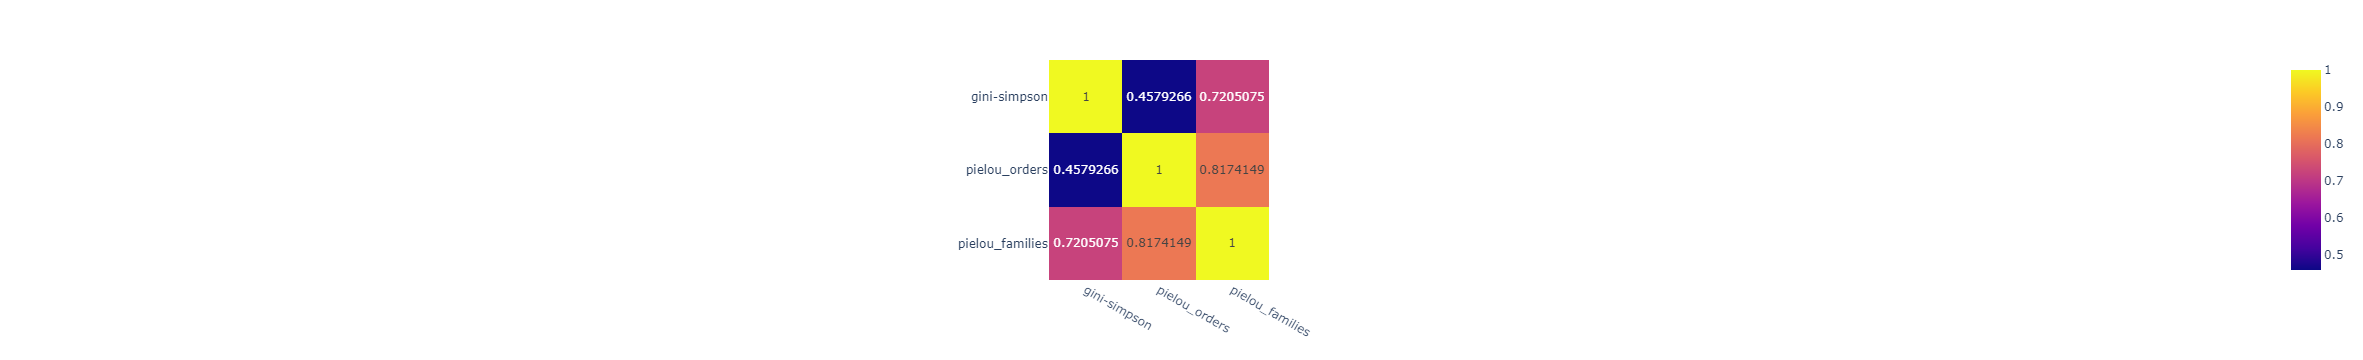

In [680]:
output_frame_a_corr = output_frame_a
corr_colums_bd = ['gini-simpson','pielou_orders','pielou_families']

for col in corr_colums_bd:
#    output_frame_a_corr[col] = output_frame_a_corr[col].replace('-', np.nan).astype(float)
    output_frame_a_corr[col] = output_frame_a_corr[col].astype(float)

    
output_frame_a_corr = output_frame_a_corr[corr_colums_bd].corr(method='spearman').round(2)
fig = px.imshow(output_frame_a_corr, text_auto=True)
fig.show()

In [456]:
output_frame_a_corr

gini-simpson  pielou_orders  pielou_families
gini-simpson         1.000000      -0.156300        -0.046421
pielou_orders       -0.156300       1.000000         0.817585
pielou_families     -0.046421       0.817585         1.000000

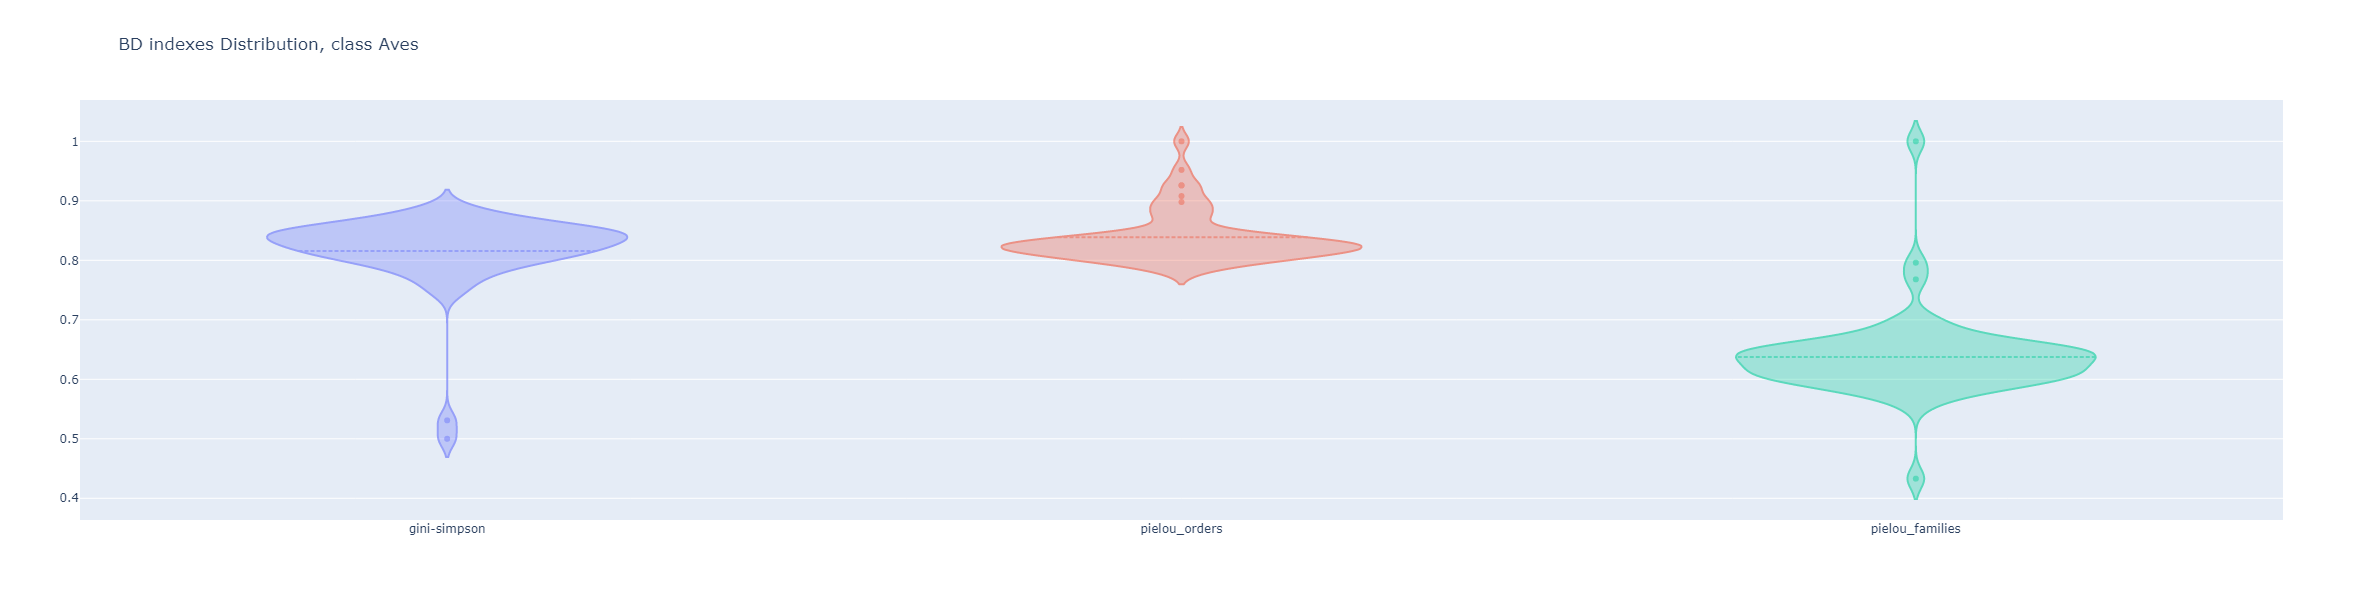

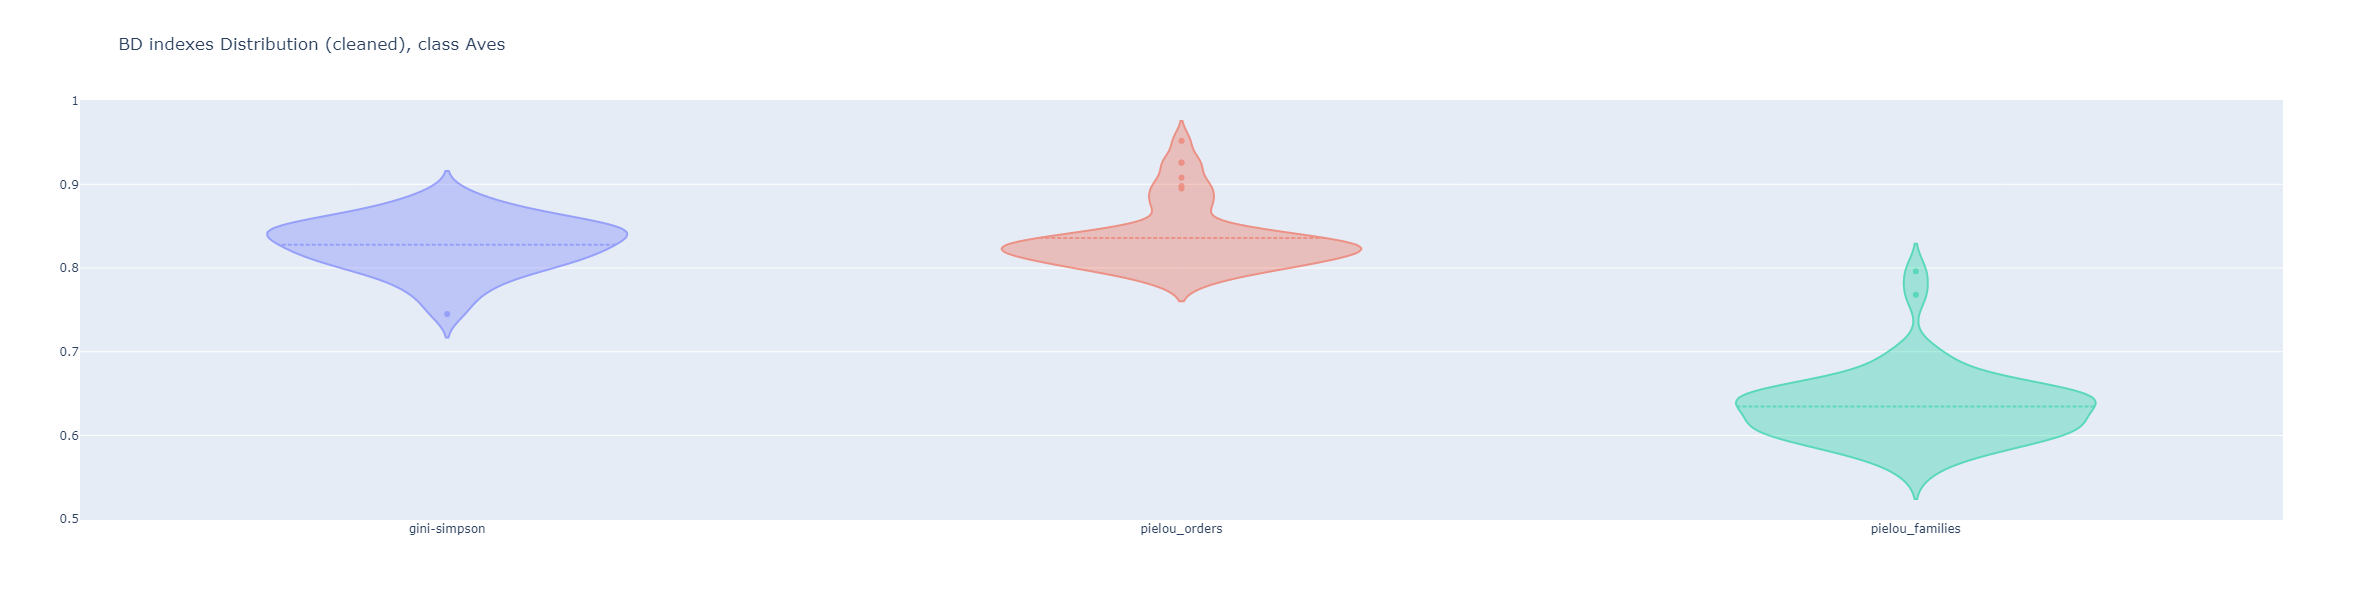

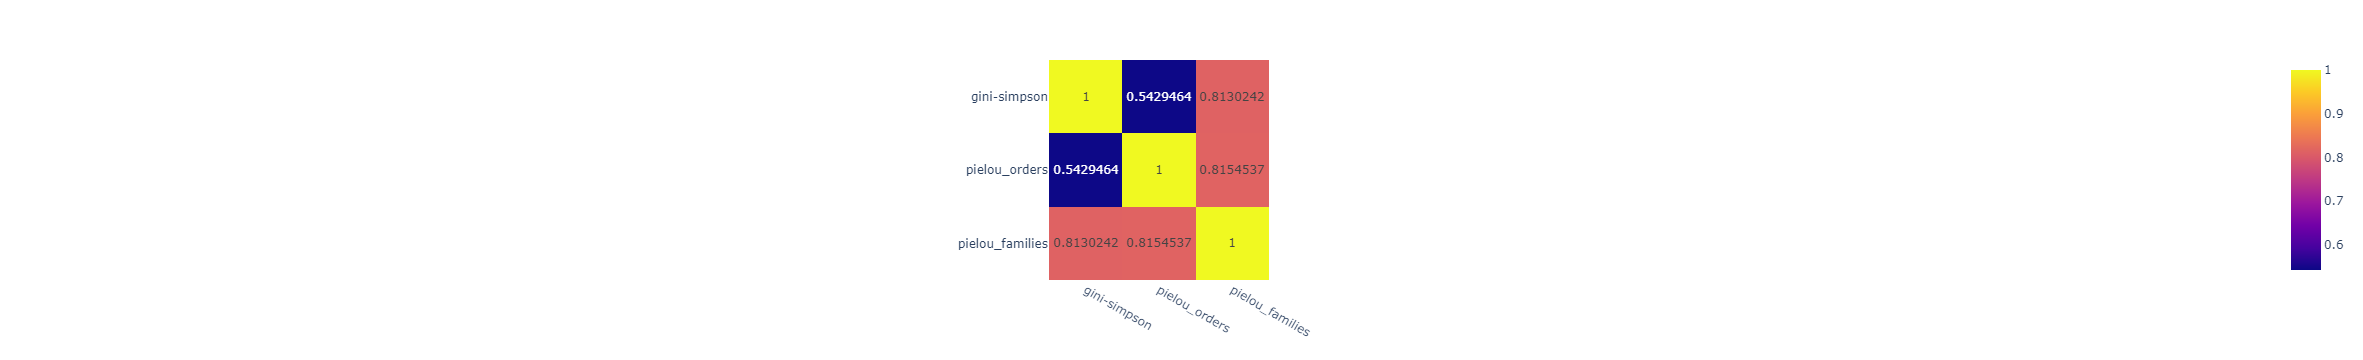

In [687]:
fig = go.Figure()

bd_cols_a = ['gini-simpson','pielou_orders','pielou_families']
for c in bd_cols_a:
    fig.add_trace(pg.Violin(y=output_frame_a[c],
                            meanline_visible=True, opacity=0.6, name=c))
fig.update_layout(showlegend=False, height=600, title_text='BD indexes Distribution, class Aves')
fig.show()


#Histograms excluding cities

out = ['Hanga Roa', 'Tocopilla','Iloca'] # delete cities out of range for gini-simpson
out_fil = output_frame_a.loc[~output_frame_a['city'].isin(out)]

fig2 = go.Figure()
bd_cols_a = ['gini-simpson','pielou_orders','pielou_families']
for c in bd_cols_a:
    fig2.add_trace(pg.Violin(y=out_fil[c],
                            meanline_visible=True, opacity=0.6, name=c))
fig2.update_layout(showlegend=False, height=600, title_text='BD indexes Distribution (cleaned), class Aves')
fig2.show()

out_fil_corr = out_fil
out_fil_corr = out_fil_corr[corr_colums_bd].corr(method='spearman').round(2)
fig3 = px.imshow(out_fil_corr, text_auto=True)
fig3.show()


#POR QUÉ SI EL VIOLINPLOT DE GINI ES MÁS PARECIDO AL DE P ORDERS QUE AL DE FAMILY, LA CORRELACIÓN DA AL REVÉS?
#NO ME HACE SENTIDO QUE ESTÉN TAAAN POCO CORRELACIONADOS AMBOS ÍNDICES (GINI Y PIELOU) PORQUE LA INTERPRETACIÓN DE ELLOS ES LA MISMA

# VER LOS HISTOGRAMAS DE ABAJO, EFECTIVAMENTE NO HAY CORRELACIÓN. AUNQUE NO ENTIENDO BIEN POR QUÉ

In [539]:
out_fil_a[out_fil_a['gini-simpson']<0.6]

city  n_orders  n_families  shannon-weiner  gini-simpson  pielou_orders  \
21  Iloca         3           8             0.9         0.531          0.819   

    pielou_families  
21            0.433

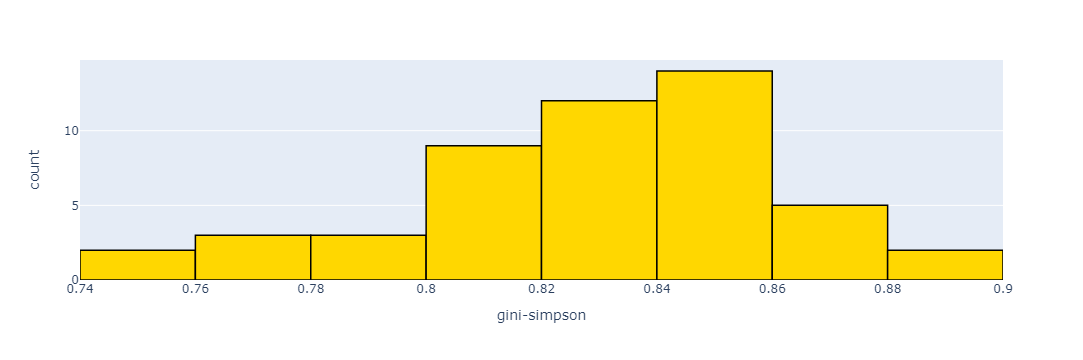

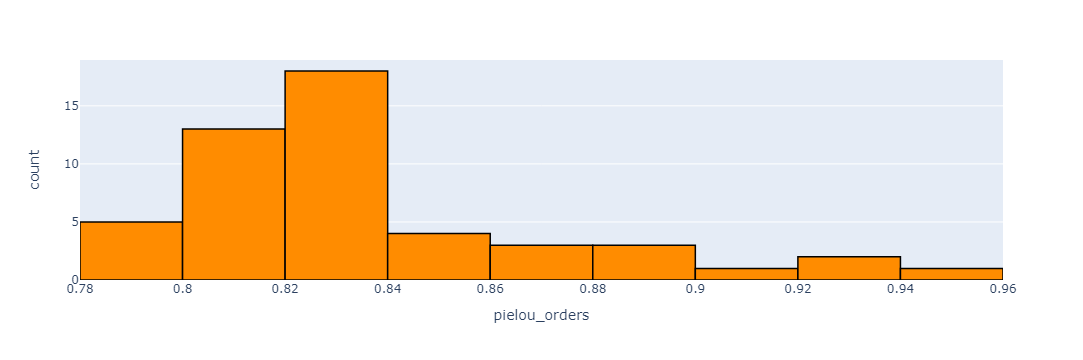

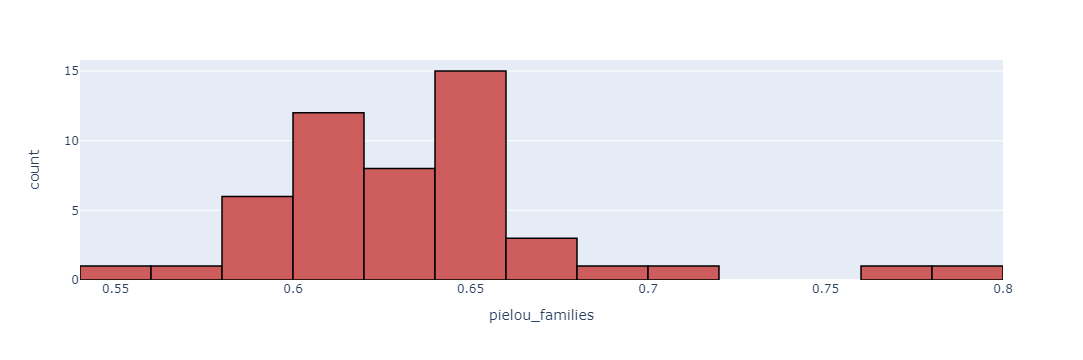

In [540]:
#histogramas excliding hanga, tocpilla e iloca
out = ['Hanga Roa', 'Tocopilla','Iloca']
out_fil_a = output_frame_a.loc[~output_frame_a['city'].isin(out)]
fig = px.histogram(out_fil_a,x='gini-simpson')
fig.update_traces(marker_color='gold', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')
fig.show()

fig2 = px.histogram(out_fil_a,x='pielou_orders')
fig2.update_traces(marker_color='darkorange', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')

fig2.show()

fig3 = px.histogram(out_fil_a,x='pielou_families')
fig3.update_traces(marker_color='indianred', marker_line_color='#000000',
                  marker_line_width=1.5, textfont_size=11, textfont_color='#000000')

fig3.show()

## Datos Resiliencia

In [558]:
resil = pd.read_csv(r'C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Datos\ind_resil.csv',sep=';') 

In [575]:
resil = resil.rename(columns={'Tourism income per capita [CLP/month*hab]':'Tourism income per capita [CLP/month pp]'})
resil = resil.rename(columns={'Name':'City'})

In [633]:
resil.columns

Index(['City', 'Name Cod', 'Total number interviewed', 'Tourism workers',
       'Tourism income [CLP/month]',
       'Tourism income per capita [CLP/month pp]', 'Fishery workers',
       'Fishery income [CLP/month]',
       'Fishery income per capita [CLP/month pp]',
       'Per capita income [CLP/month pp]', 'Tourism-dependent economy [%]',
       'Percentage of coastal dependent occupations in service sector [%]',
       'Percentage of the community working in the fishery sector [%]',
       'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]'],
      dtype='object')

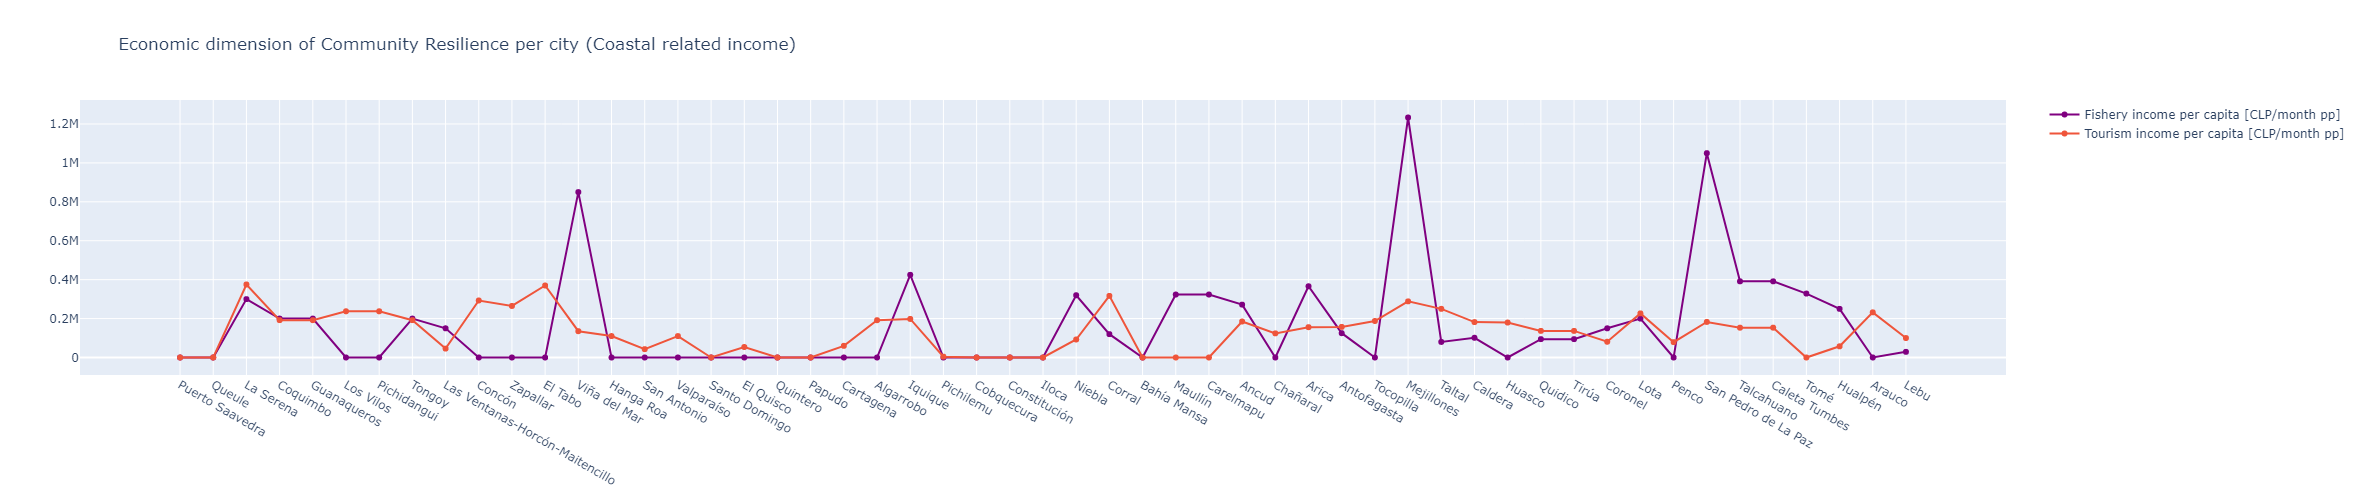

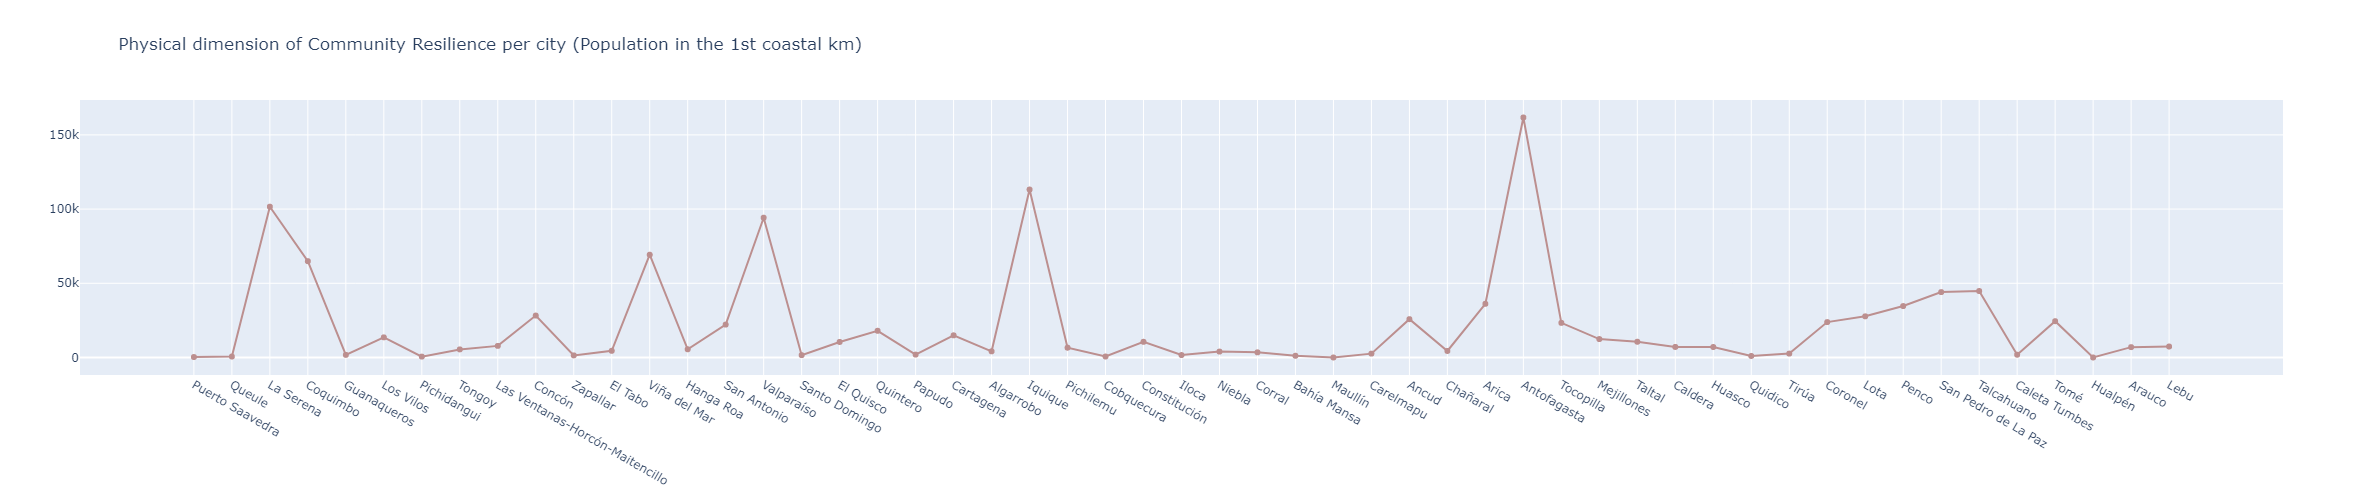

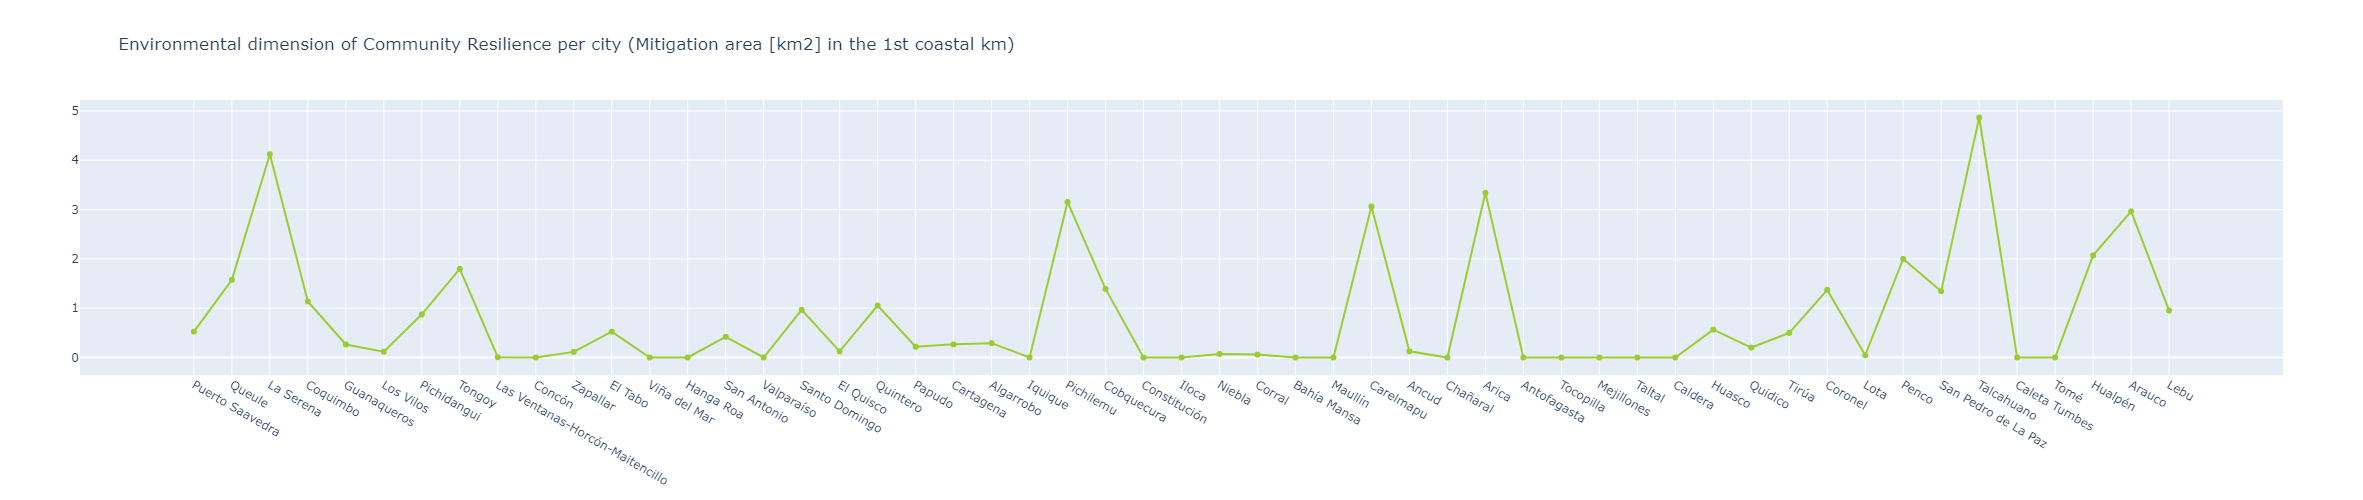

In [689]:
#Resilience data graphs

pd.options.plotting.backend = "plotly"

fig = pg.Figure()
fig.add_trace(pg.Scatter(x=resil['City'], y=resil['Fishery income per capita [CLP/month pp]'],                 
                         name='Fishery income per capita [CLP/month pp]',mode='lines+markers'))
fig.update_traces(marker_color='purple')               
fig.add_trace(pg.Scatter(x=resil['City'], y=resil['Tourism income per capita [CLP/month pp]'],
                         name='Tourism income per capita [CLP/month pp]',mode='lines+markers'))
fig.update_layout(height=500, font_size=12, title_text="Economic dimension of Community Resilience per city (Coastal related income)",showlegend=True)
fig.show()

fig2 = pg.Figure()
fig2.add_trace(pg.Scatter(x=resil['City'], y=resil['People in 1 coastal km'],                 
                         name='People in 1 coastal km', mode='lines+markers'))
fig2.update_traces(marker_color='rosybrown')
fig2.update_layout(height=500, font_size=12, title_text="Physical dimension of Community Resilience per city (Population in the 1st coastal km)")
fig2.show()


fig3 = pg.Figure()
fig3.add_trace(pg.Scatter(x=resil['City'], y=resil['Mitigation area 1 coastal km [km2]'],                 
                         name='Mitigation area 1 coastal km [km2]', mode='lines+markers'))
fig3.update_traces(marker_color='yellowgreen')
fig3.update_layout(height=500, font_size=12, title_text="Environmental dimension of Community Resilience per city (Mitigation area [km2] in the 1st coastal km)")
fig3.show()

#fig2 = px.line(resil, x='City', y='People in 1 coastal km', color='lightsteelblue', markers=True)
#fig2 = pg.Scatter(x=resil['City'], y=resil['People in 1 coastal km'],mode='lines+markers',color='lightsteelblue')
#fig2.update_traces(marker_color='lightsteelblue')
#fig2.show()

#fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
#fig.show()

#fig3 = pg.Scatter(x=resil['City'], y=resil['Mitigation area 1 coastal km [km2]'])
#fig3.update_traces(marker_color='lightgreen')

In [ ]:
# from sklearn.metrics import mutual_info_score
# from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
# import torch
# input = torch.randn(3, 5, requires_grad=True)
# >>> target = torch.randint(5, (3,), dtype=torch.int64)
# >>> loss = F.cross_entropy(input, target)
# >>> loss.backward()

# Relation Analysis BD-Resilience

In [816]:
bd_resil = output_frame.merge(resil, left_on=['city'], right_on=['City'], how='outer')
bd_resil_a = output_frame_a.merge(resil, left_on=['city'], right_on=['City'], how='outer')
gini_corr_columns = [ 'gini-simpson', 
                'Tourism income per capita [CLP/month pp]',
                'Fishery income per capita [CLP/month pp]',
                'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]']
pielou_corr_columns = ['pielou',                
                'Tourism income per capita [CLP/month pp]',
                'Fishery income per capita [CLP/month pp]',
                'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]']

pielou_corr_columns_a = ['pielou_orders','pielou_families',                
                'Tourism income per capita [CLP/month pp]',
                'Fishery income per capita [CLP/month pp]',
                'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]']

#excluding cities
bd_resil_fil_a = out_fil_a.merge(resil,left_on=['city'],right_on=['City'],how='outer')


### Gini-Simpson and Resiliences

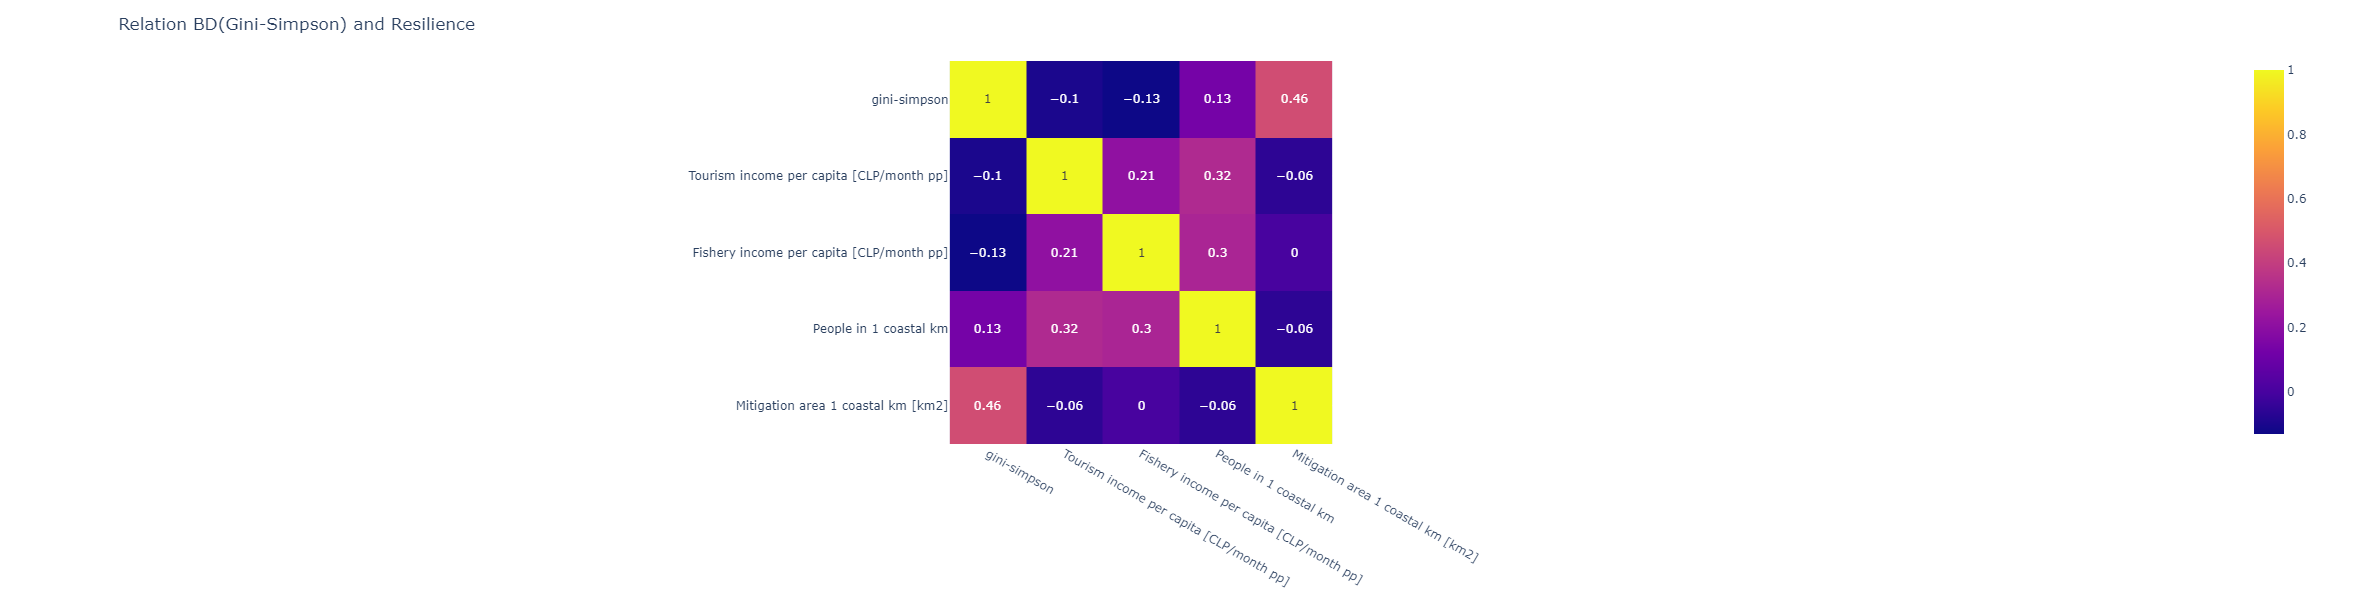

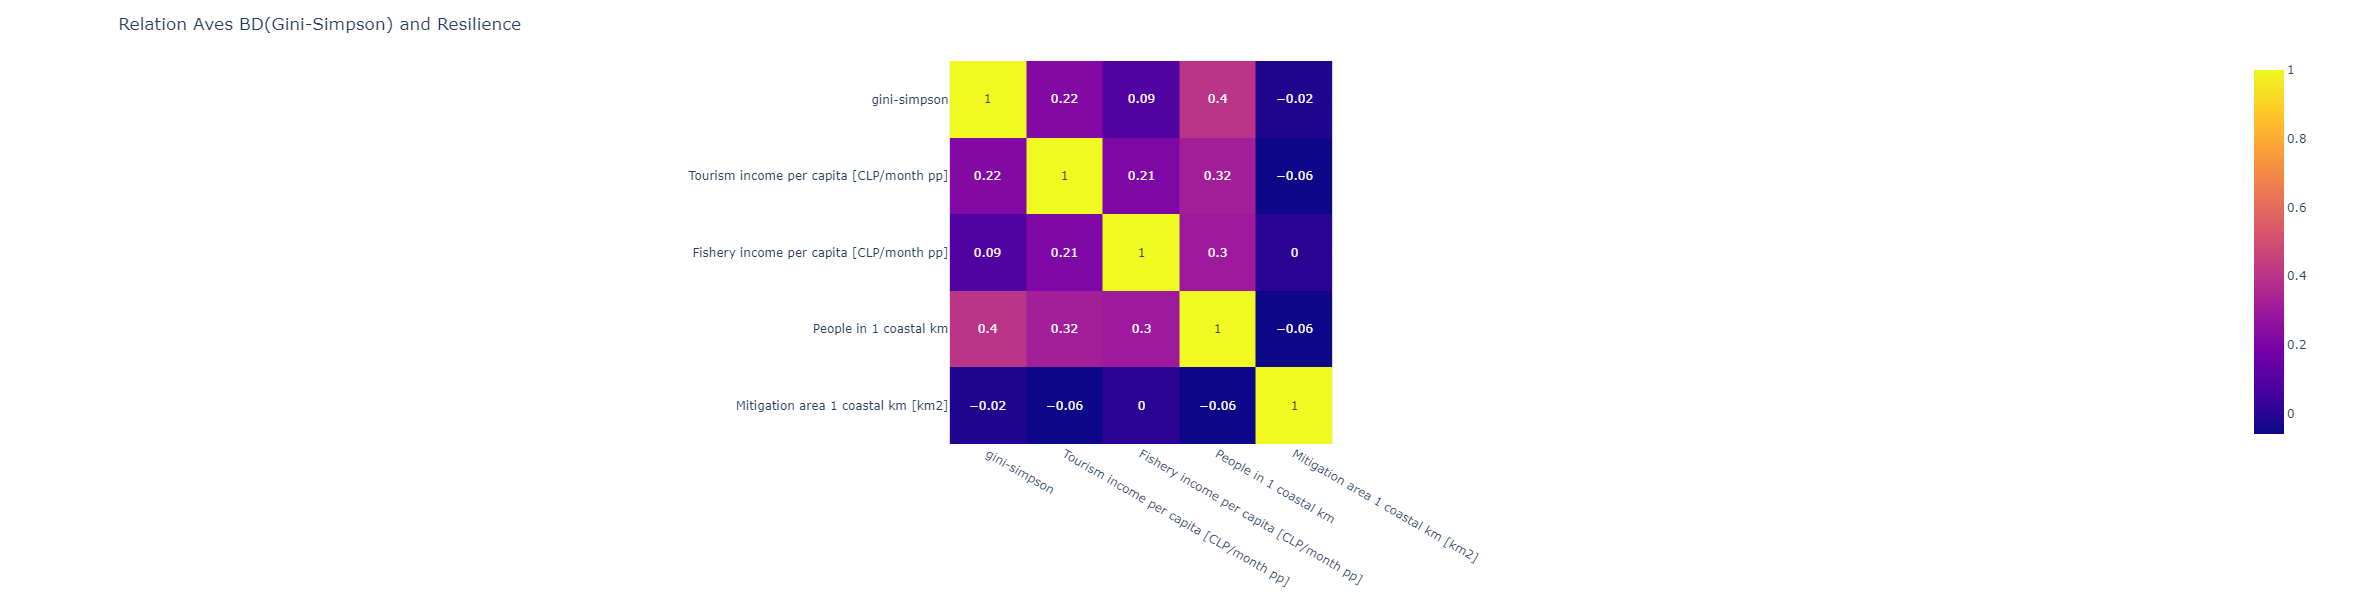

In [691]:
gini_bd_resil_corr = bd_resil[gini_corr_columns].corr(method='spearman').round(2)
fig = px.imshow(gini_bd_resil_corr, text_auto=True)
fig.update_layout(height=600, font_size=12, title_text="Relation BD(Gini-Simpson) and Resilience")
fig.show()

gini_bd_resil_corr_a = bd_resil_a[gini_corr_columns].corr(method='spearman').round(2)
fig2 = px.imshow(gini_bd_resil_corr_a, text_auto=True)
fig2.update_layout(height=600, font_size=12, title_text="Relation Aves BD(Gini-Simpson) and Resilience")
fig2.show()

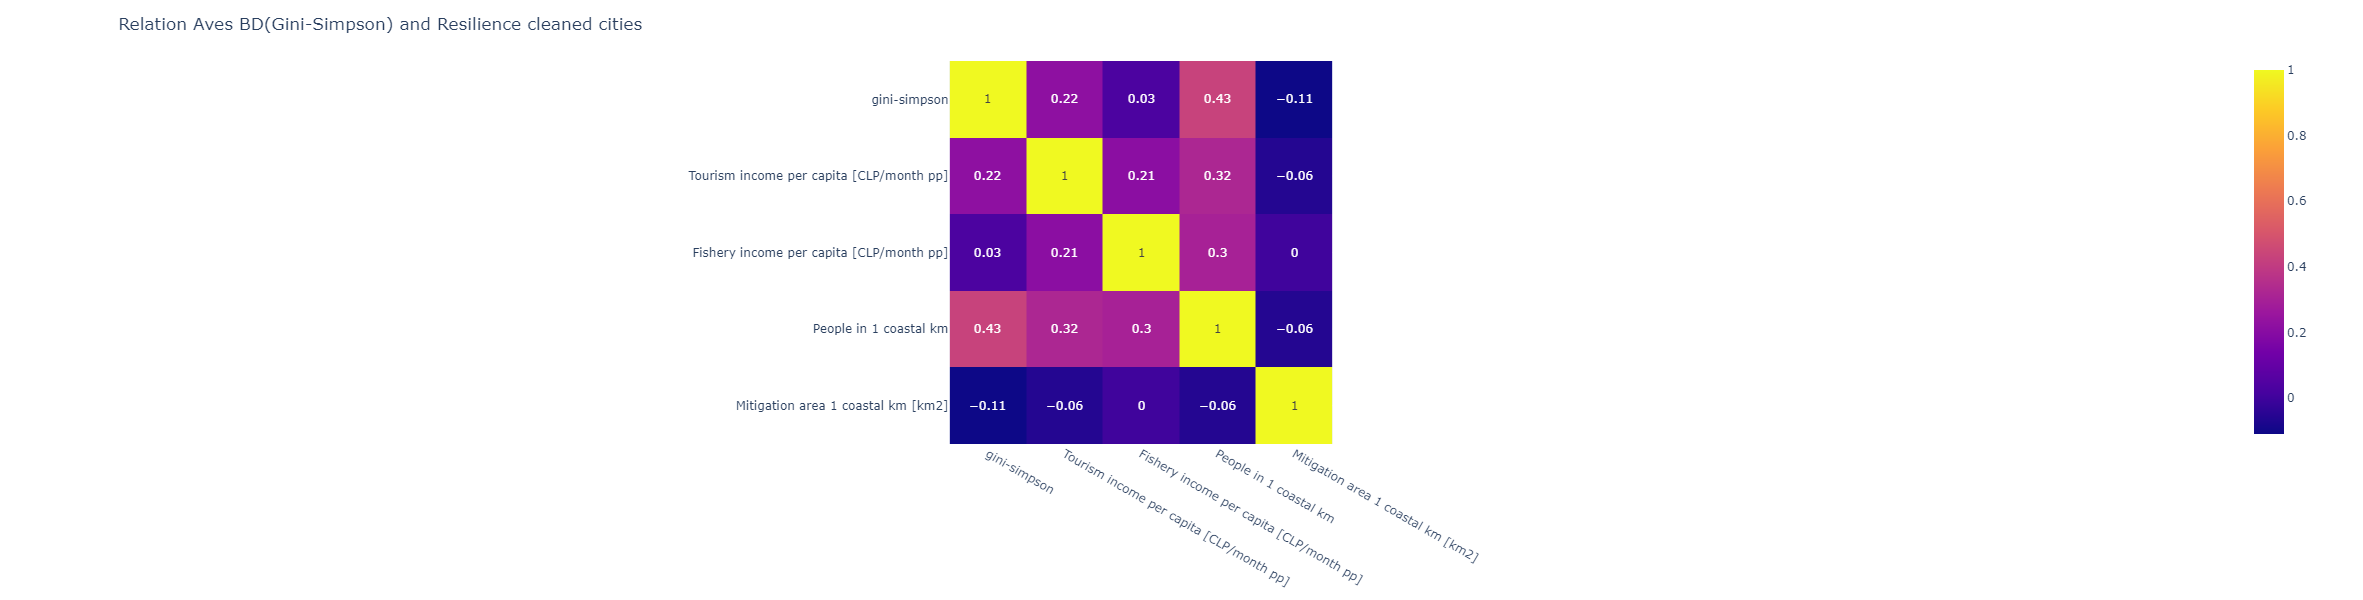

In [697]:
# Excluding cities (Aves)

fil_gini_bd_resil_corr_a = bd_resil_fil_a[gini_corr_columns].corr(method='spearman').round(2)
fig2 = px.imshow(fil_gini_bd_resil_corr_a, text_auto=True)
fig2.update_layout(height=600, font_size=12, title_text="Relation Aves BD(Gini-Simpson) and Resilience cleaned cities")
fig2.show()

# aumenta la correlación con people y mitigation, disminuye con fishery y se mantiene en tourism

### Pielou and Resilience

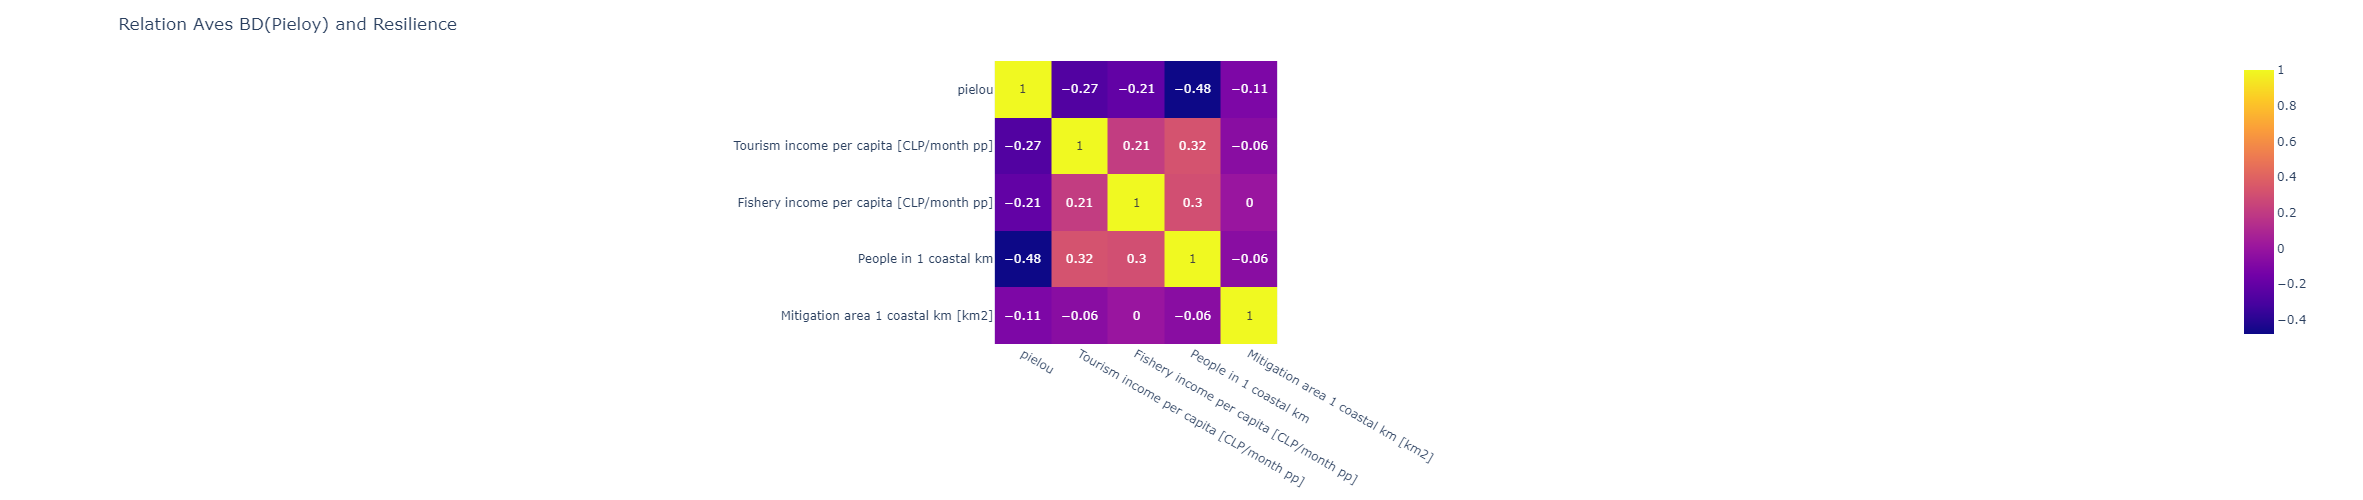

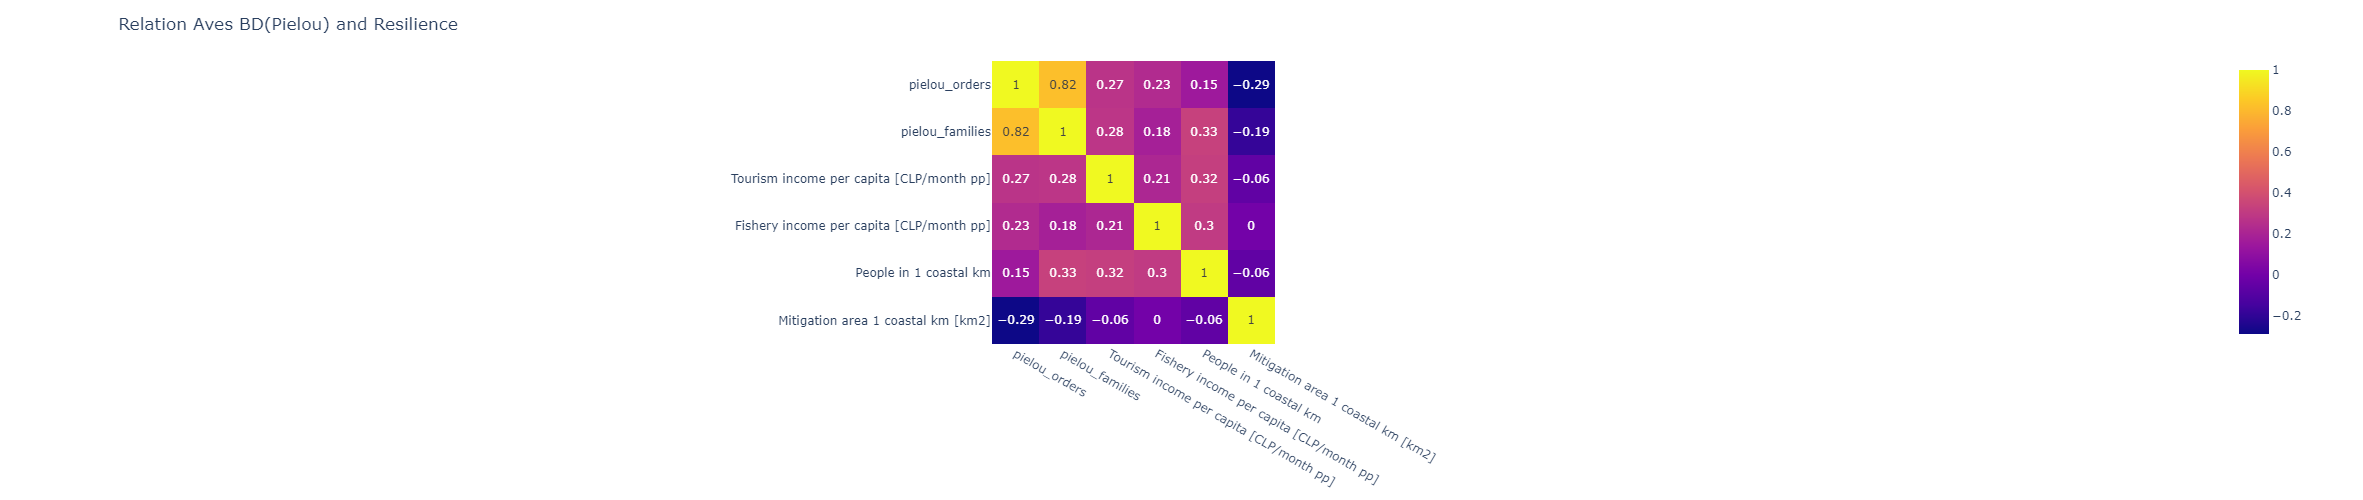

In [692]:
pielou_bd_resil_corr = bd_resil[pielou_corr_columns].corr(method='spearman').round(2)
fig = px.imshow(pielou_bd_resil_corr,text_auto=True)
fig.update_layout(height=500, font_size=12, title_text="Relation Aves BD(Pieloy) and Resilience")
fig.show()

pielou_bd_resil_corr_a = bd_resil_a[pielou_corr_columns_a].corr(method='spearman').round(2)
fig2 = px.imshow(pielou_bd_resil_corr_a,text_auto=True)
fig2.update_layout(height=500, font_size=12, title_text="Relation Aves BD(Pielou) and Resilience")
fig2.show()

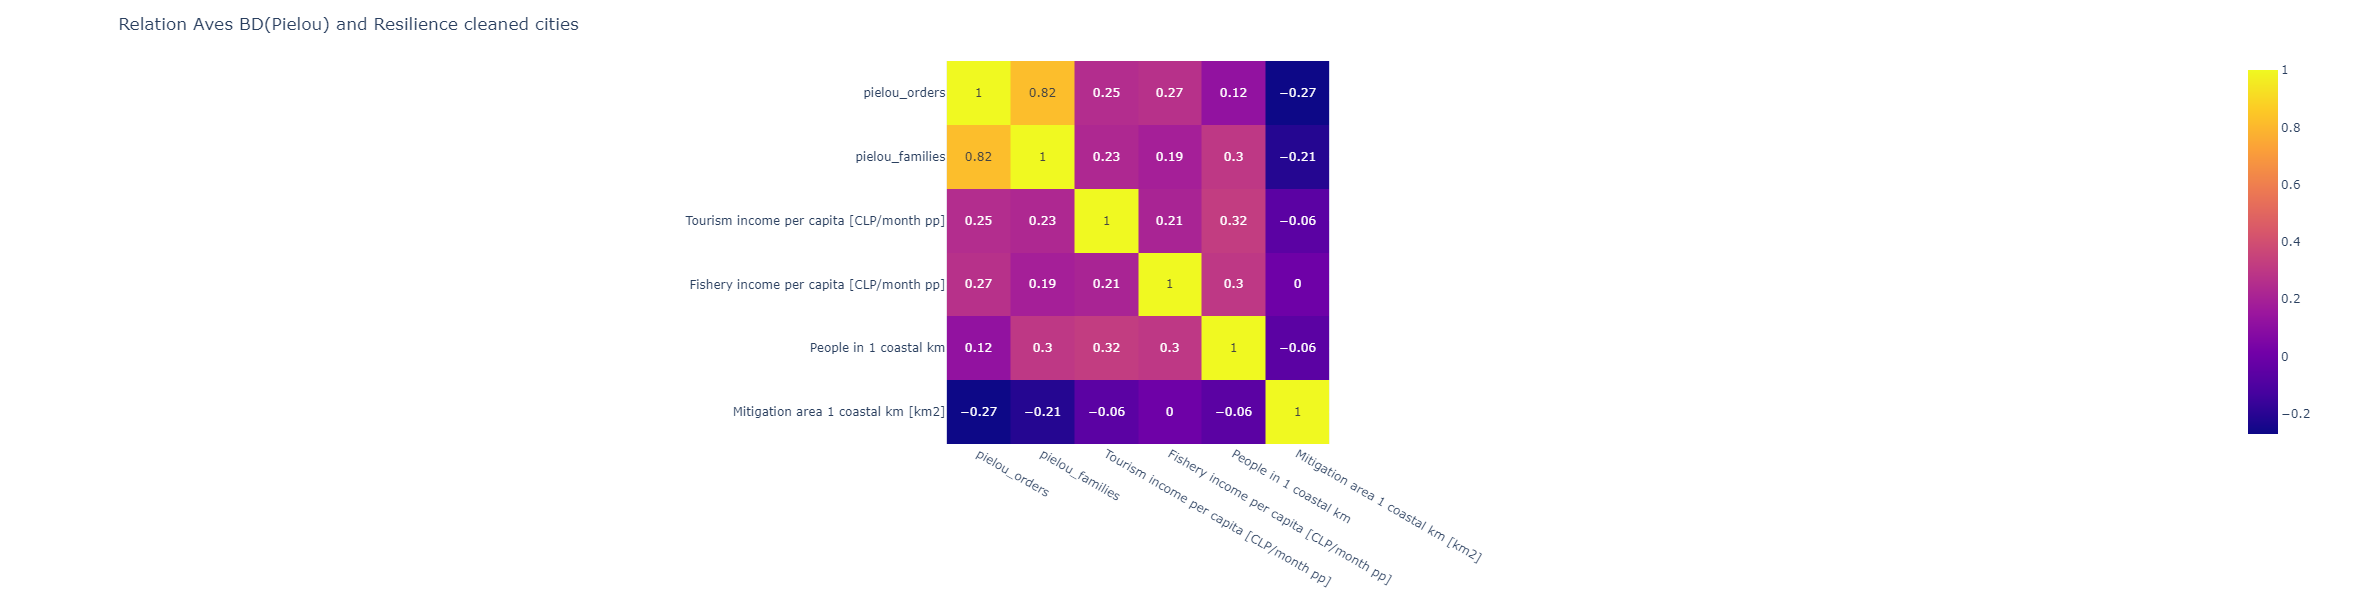

In [700]:
# Excluding cities (Aves)

fil_pielou_bd_resil_corr_a = bd_resil_fil_a[pielou_corr_columns_a].corr(method='spearman').round(2)
fig2 = px.imshow(fil_pielou_bd_resil_corr_a, text_auto=True)
fig2.update_layout(height=600, font_size=12, title_text="Relation Aves BD(Pielou) and Resilience cleaned cities")
fig2.show()

#Para pielou orders solo subió la correlación en fishery, en las demás bajó.
#Para pielou families además subió un poco en mitigation, pero sigue siendo negativa

In [808]:
df = px.data.iris()
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

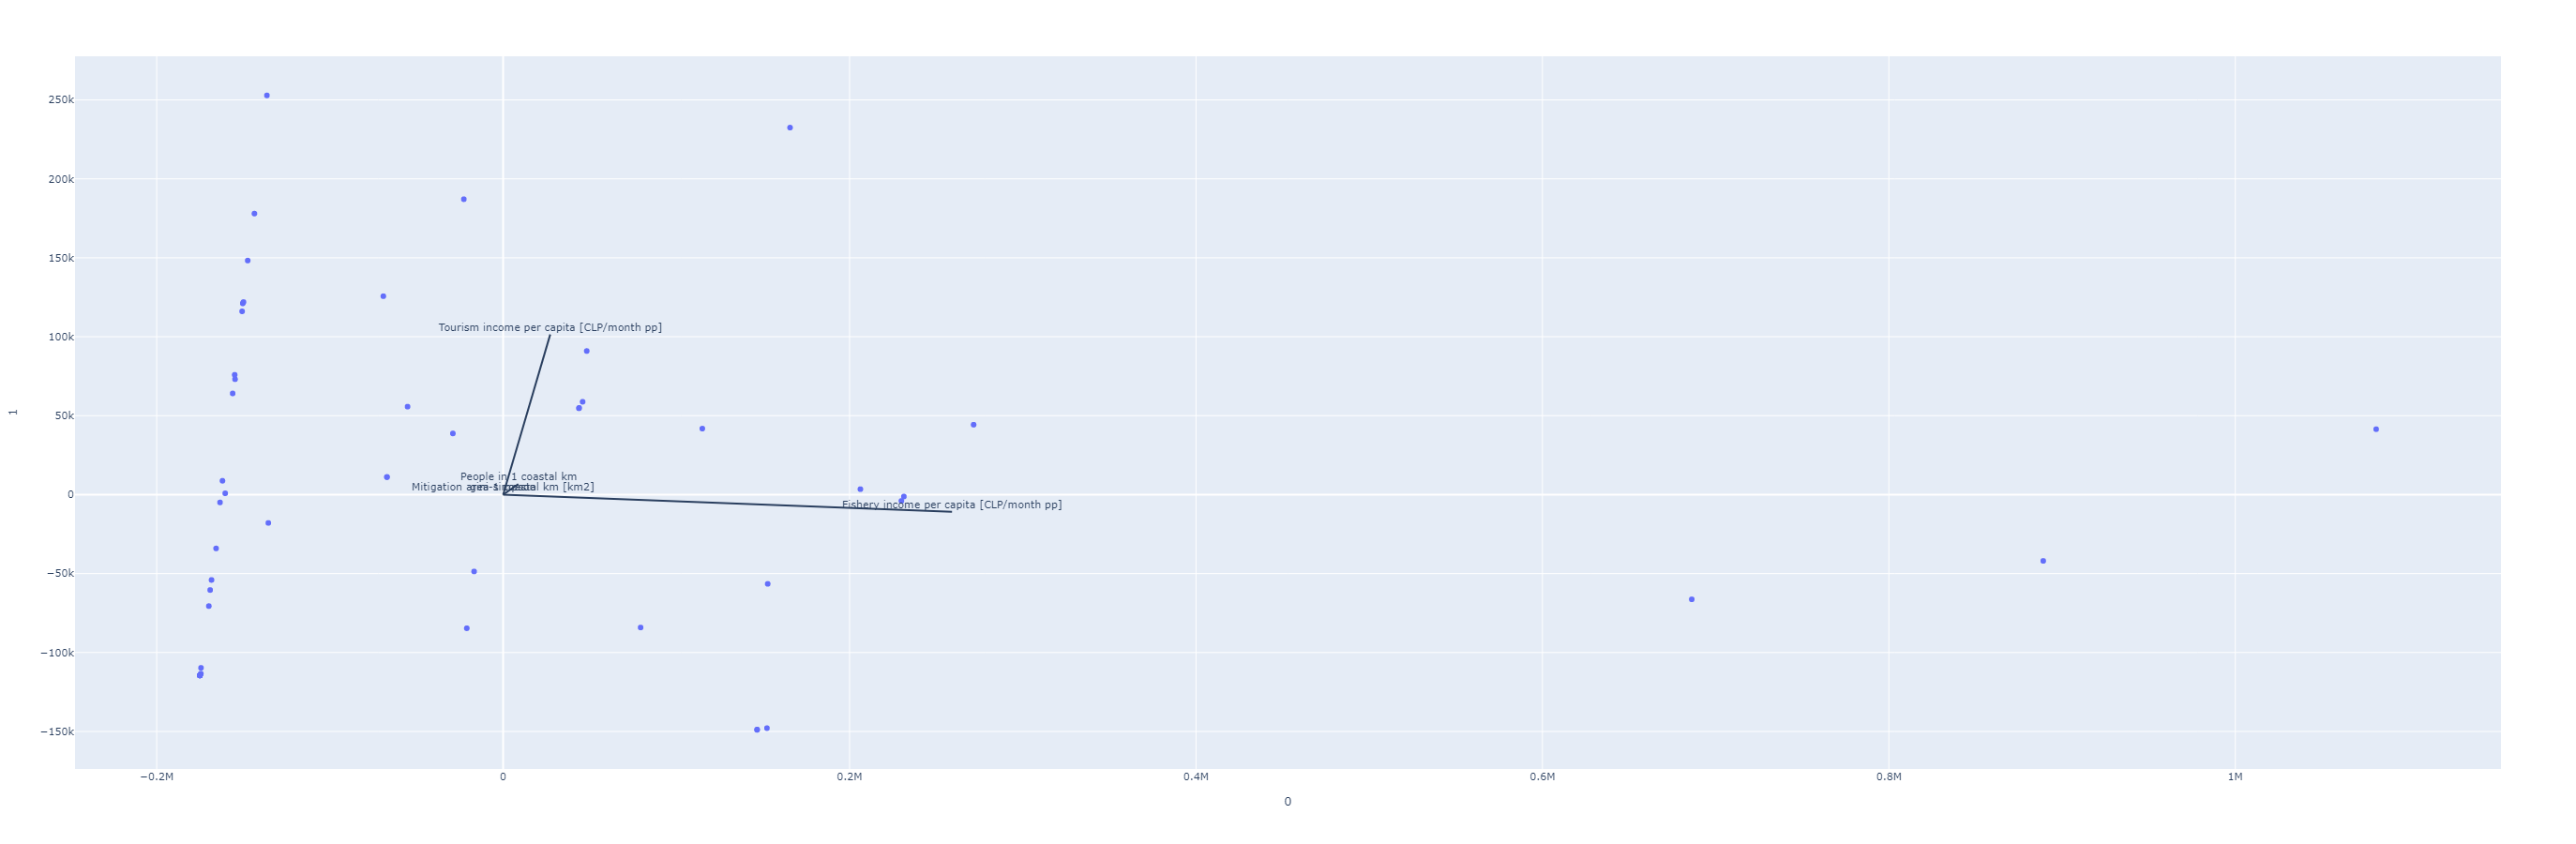

In [821]:
# bd_resil = output_frame.merge(resil, left_on=['city'], right_on=['City'], how='outer')
# bd_resil_a = output_frame_a.merge(resil, left_on=['city'], right_on=['City'], how='outer')
# gini_corr_columns = [ 'gini-simpson', 
#                 'Tourism income per capita [CLP/month pp]',
#                 'Fishery income per capita [CLP/month pp]',
#                 'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]']
# pielou_corr_columns = ['pielou',                
#                 'Tourism income per capita [CLP/month pp]',
#                 'Fishery income per capita [CLP/month pp]',
#                 'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]']

# pielou_corr_columns_a = ['pielou_orders','pielou_families',                
#                 'Tourism income per capita [CLP/month pp]',
#                 'Fishery income per capita [CLP/month pp]',
#                 'People in 1 coastal km', 'Mitigation area 1 coastal km [km2]']

# #excluding cities
# bd_resil_fil_a = out_fil_a.merge(resil,left_on=['city'],right_on=['City'],how='outer')





import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#df = px.data.iris() # esto sería bd resil

#features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] las corr columns
#X = df[features] dataframe con las corr columns
X = bd_resil[gini_corr_columns]
Y= bd_resil[pielou_corr_columns]
X2= bd_resil_a[gini_corr_columns]
Y2=bd_resil_a[pielou_corr_columns_a]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#fig = px.scatter(components, x=0, y=1, color=df['species'])
fig = px.scatter(components, x=0, y=1)
for i, feature in enumerate(gini_corr_columns):
#for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.update_layout(height=900, font_size=11)
fig.show()

#no entiendo cómo se interpretan los pca :/

# Celdas que borrar

In [ ]:
#a= plt.hist(out_fil['gini-simpson'])
#a.set_yscale('log') AttributeError: 'tuple' object has no attribute 'set_yscale'
out_fil['gini-simpson'].plot(kind='hist', logx=True)


In [ ]:
out_fil['log_gini'] = np.log(out_fil['gini-simpson'])

#Ojo con este warning
#A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead

#See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#  out_fil['log_gini'] = np.log(out_fil['gini-simpson'])

In [ ]:
sns.histplot(out_fil,x='log_gini')

In [ ]:
out_fil['log10_gini'] = np.log10(out_fil['gini-simpson'])
sns.histplot(out_fil,x='log10_gini')

In [ ]:
#sns.displot(output_frame,x='gini-simpson',hue='city',kind='kde') #este no me sirve pq tengo 1 gini x ciudad

In [ ]:
output_frame = pd.concat(output_df).reset_index(drop=True)

In [ ]:
output_frame.occurrence.sum()

In [ ]:
output_frame.max()

In [464]:
output_frame['occurrence'].idxmax() #Arica

5

In [ ]:
output_frame['shannon-weiner'].idxmax() #Penco

In [ ]:
output_frame['gini-simpson'].idxmax() #Penco

In [ ]:
output_frame['pielou'].idxmax() #Hanga Roa

In [ ]:
pd.concat(output_df).reset_index(drop=True)

In [ ]:
output_frame_a

In [ ]:
dfs_a['Algarrobo'].family.sum()

In [ ]:
len(dfs_a['Iloca'])

In [ ]:
penc_pr = pd_cities.query('ciudad=="Penco"').query('clase=="Aves"') #1962 rows
penc_pr.groupby('order')['family'].nunique().to_frame()

In [ ]:
alg_pr= pd_cities.query('ciudad=="Algarrobo"').query('clase=="Aves"').groupby('order')['family'].nunique().to_frame()

In [ ]:
a_pr= pd_cities.query('ciudad=="Niebla"').query('clase=="Aves"').groupby('order')['family'].nunique().to_frame()

In [ ]:
len(alg_pr)

In [ ]:
output_frame_a

In [ ]:
dfs['Hanga Roa']['clase'].value_counts()

In [ ]:
for city in ciudades:
    print(dfs[city]['clase'].value_counts())

In [ ]:
dfs['Arica'] #pd_cities.query("ciudad == 'Arica'")

In [ ]:
dfs['Arica'].clase.value_counts()

In [ ]:
dfs['Arica'].query("clase == 'Aves'").family.value_counts()

In [ ]:
dfs['Arica'].query("clase == 'Aves'").verbatimScientificName.value_counts()

In [ ]:
(dfs['Arica'].query("clase == 'Aves'")
 .groupby('order')['family'].nunique()
 .to_frame().sort_values(by='family',ascending=False))

In [ ]:
#Datos BD por ciudad

fil_alg = pd_cities[pd_cities['ciudad']=='Algarrobo'] #DataFrame por ciudad


occ_alg = fil_alg.shape[0] #Occurrences por ciudad


esp_alg=len(fil_alg['verbatimScientificName'].value_counts()) #Species richness por ciudad
esp_val=len(fil_val['verbatimScientificName'].value_counts())

esp_alg_s = fil_alg['verbatimScientificName'].value_counts() #Especies (verbatimScientificName) y cuántas ocurrencias hay por especie
esp_val_s = fil_val['verbatimScientificName'].value_counts() 

esp_alg_f = pd.DataFrame(esp_alg_s) #DataFrame cálculos especie
esp_val_f = pd.DataFrame(esp_val_s)

#Columnas del dataframe
esp_alg_f['pi'] = esp_alg_f['verbatimScientificName']/occ_alg
esp_alg_f['lnpi'] = np.log(esp_alg_f['pi'])
esp_alg_f['pixlnpi'] = esp_alg_f['pi']*esp_alg_f['lnpi']
esp_alg_f['pi2'] = esp_alg_f['pi']*esp_alg_f['pi']

esp_val_f['pi'] = esp_val_f['verbatimScientificName']/occ_val
esp_val_f['lnpi'] = np.log(esp_val_f['pi'])
esp_val_f['pixlnpi'] = esp_val_f['pi']*esp_val_f['lnpi']
esp_val_f['pi2'] = esp_val_f['pi']*esp_val_f['pi']

#Output especies
#Shannon-Weiner
esp_sw_alg = round(-1*esp_alg_f['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_alg = round(1-(esp_alg_f['pi2'].sum()),3)
#Hmax
esp_hmax_alg = round(np.log(esp_alg),3)
#Pielou
esp_p_alg = round((esp_sw_alg/esp_hmax_alg),3)

#Shannon-Weiner
esp_sw_val = round(-1*esp_val_f['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_val = round(1-(esp_val_f['pi2'].sum()),3)
#Hmax
esp_hmax_val = round(np.log(esp_val),3)
#Pielou
esp_p_val = round((esp_sw_val/esp_hmax_val),3)

#niebla = {('Occurrences',occu_niebla),('Sp_richness',esp_niebla),('Sp_Shannon-weiner',esp_sw_niebla),('Sp_Gini-Simpson',esp_gs_niebla),('Sp_Pielou',esp_p_niebla)}


